In [1]:
# Set up
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

import wooldridge as woo

## Data Illustration 

In [2]:
org_data = woo.data('wage2')
org_data.head()

wage  hours   IQ  KWW  educ  exper  tenure  age  married  black  south  \
0   769     40   93   35    12     11       2   31        1      0      0   
1   808     50  119   41    18     11      16   37        1      0      0   
2   825     40  108   46    14     11       9   33        1      0      0   
3   650     40   96   32    12     13       7   32        1      0      0   
4   562     40   74   27    11     14       5   34        1      0      0   

   urban  sibs  brthord  meduc  feduc     lwage  
0      1     1      2.0    8.0    8.0  6.645091  
1      1     1      NaN   14.0   14.0  6.694562  
2      1     1      2.0   14.0   14.0  6.715384  
3      1     4      3.0   12.0   12.0  6.476973  
4      1    10      6.0    6.0   11.0  6.331502

**In this data, the variables means as follows:**\
**wage**: monthly earnings\
**hours**: average weekly hours\
**IQ**: IQ score\
**KWW**: knowledge of world work score\
**educ**: years of education\
**exper**: years of work experience\
**tenure**: years with current employer\
**age**: age in years\
**married**: =1 if married\
**black**: =1 if black\
**south**: =1 if live in south\
**urban**: =1 if live in SMSA\
**sibs**: number of siblings\
**brthord**: birth order\
**meduc**: mother's education\
**feduc**: father's education\
**lwage**: natural log of wage

**Motivation:** According to the project description, we need to get a regression model with only one regressor, so we choose the wage 2 dataset in Woodbridge. We intend to set wage / lwage as the dependent variable, and then we want to find the best description from the remaining. We are going to set wage / lwage as dependent variables. Then we want to find a variable that best describes the dependent variable from the remaining 15 variables, i.e., which variable is the main influence on the change in income.

**Data Source:** M. Blackburn and D. Neumark (1992), “Unobserved Ability, Efficiency Wages, and Interindustry Wage Differentials,” Quarterly Journal of Economics 107, 1421-1436.

In [3]:
org_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wage     935 non-null    int64  
 1   hours    935 non-null    int64  
 2   IQ       935 non-null    int64  
 3   KWW      935 non-null    int64  
 4   educ     935 non-null    int64  
 5   exper    935 non-null    int64  
 6   tenure   935 non-null    int64  
 7   age      935 non-null    int64  
 8   married  935 non-null    int64  
 9   black    935 non-null    int64  
 10  south    935 non-null    int64  
 11  urban    935 non-null    int64  
 12  sibs     935 non-null    int64  
 13  brthord  852 non-null    float64
 14  meduc    857 non-null    float64
 15  feduc    741 non-null    float64
 16  lwage    935 non-null    float64
dtypes: float64(4), int64(13)
memory usage: 124.3 KB


In [4]:
org_data.isnull().sum()

wage         0
hours        0
IQ           0
KWW          0
educ         0
exper        0
tenure       0
age          0
married      0
black        0
south        0
urban        0
sibs         0
brthord     83
meduc       78
feduc      194
lwage        0
dtype: int64

In [5]:
# Replace Null Value With Mean
m_b = org_data['brthord'].mean()
org_data['brthord'].fillna(value=m_b,inplace=True)

m_me = org_data['meduc'].mean()
org_data['meduc'].fillna(value=m_me,inplace=True)

m_f = org_data['feduc'].mean()
org_data['feduc'].fillna(value=m_f,inplace=True)

In [6]:
org_data.isnull().any()

wage       False
hours      False
IQ         False
KWW        False
educ       False
exper      False
tenure     False
age        False
married    False
black      False
south      False
urban      False
sibs       False
brthord    False
meduc      False
feduc      False
lwage      False
dtype: bool

### Histograms and Density

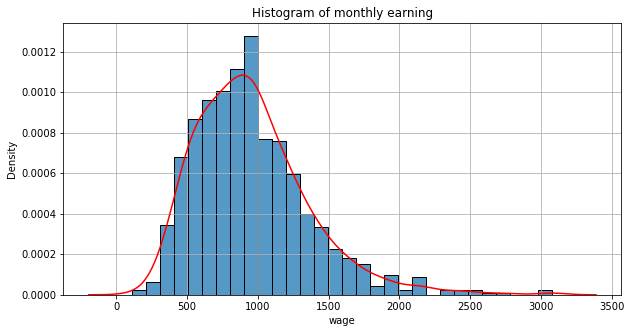

In [7]:
# Plotting wage histogram with density curve
plt.figure(figsize = (10,5))
plt.title("Histogram of monthly earning")
sns.histplot(org_data.wage, stat = "density")
sns.kdeplot(org_data.wage, color = "red")
plt.grid(True)

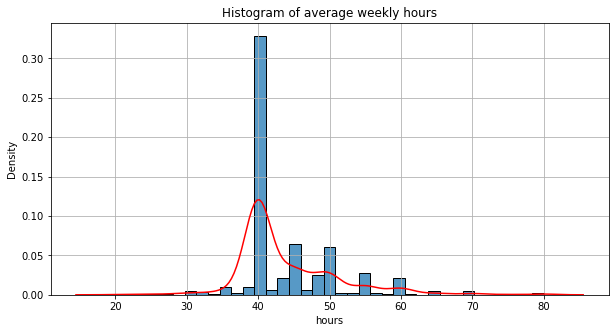

In [8]:
# Plotting hours histogram with density curve
plt.figure(figsize = (10,5))
plt.title("Histogram of average weekly hours")
sns.histplot(org_data.hours, stat = "density")
sns.kdeplot(org_data.hours, color = "red")
plt.grid(True)

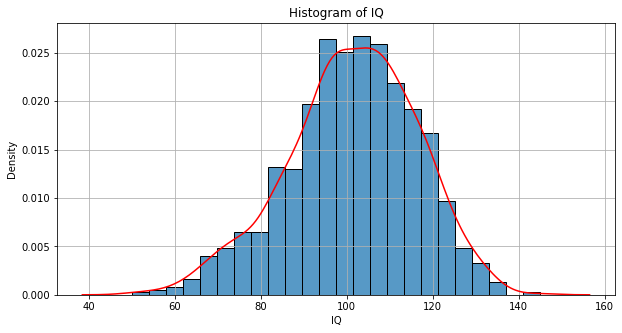

In [9]:
# Plotting IQ histogram with density curve
plt.figure(figsize = (10,5))
plt.title("Histogram of IQ")
sns.histplot(org_data.IQ, stat = "density")
sns.kdeplot(org_data.IQ, color = "red")
plt.grid(True)

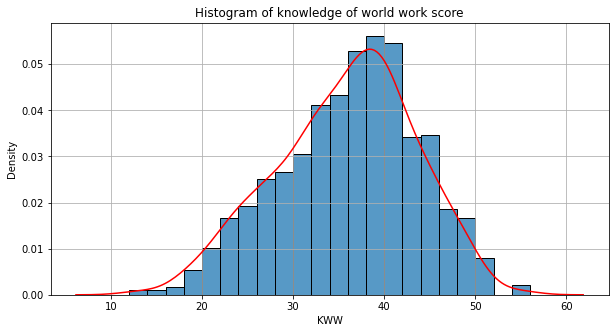

In [10]:
# Plotting KWW histogram with density curve
plt.figure(figsize = (10,5))
plt.title("Histogram of knowledge of world work score")
sns.histplot(org_data.KWW, stat = "density")
sns.kdeplot(org_data.KWW, color = "red")
plt.grid(True)

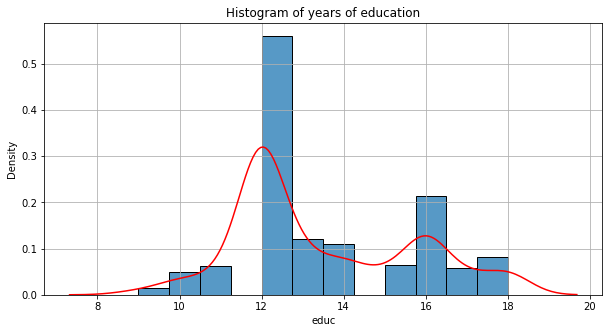

In [11]:
# Plotting educ histogram with density curve
plt.figure(figsize = (10,5))
plt.title("Histogram of years of education")
sns.histplot(org_data.educ, stat = "density")
sns.kdeplot(org_data.educ, color = "red")
plt.grid(True)

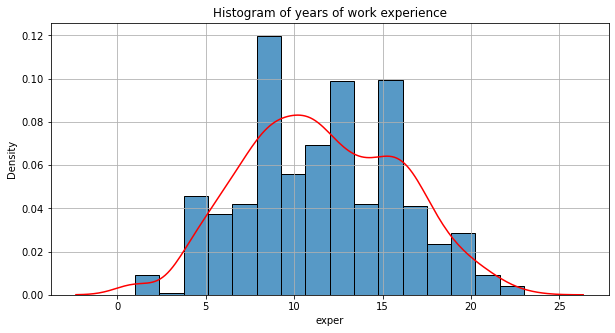

In [12]:
# Plotting exper histogram with density curve
plt.figure(figsize = (10,5))
plt.title("Histogram of years of work experience")
sns.histplot(org_data.exper, stat = "density")
sns.kdeplot(org_data.exper, color = "red")
plt.grid(True)

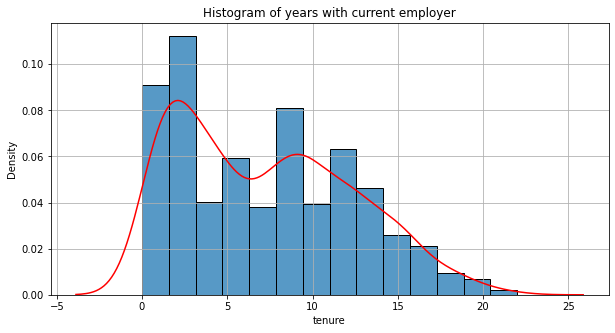

In [13]:
# Plotting tenure histogram with density curve
plt.figure(figsize = (10,5))
plt.title("Histogram of years with current employer")
sns.histplot(org_data.tenure, stat = "density")
sns.kdeplot(org_data.tenure, color = "red")
plt.grid(True)

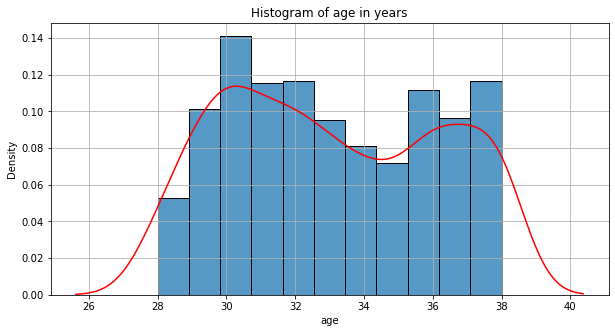

In [14]:
# Plotting age histogram with density curve
plt.figure(figsize = (10,5))
plt.title("Histogram of age in years")
sns.histplot(org_data.age, stat = "density")
sns.kdeplot(org_data.age, color = "red")
plt.grid(True)

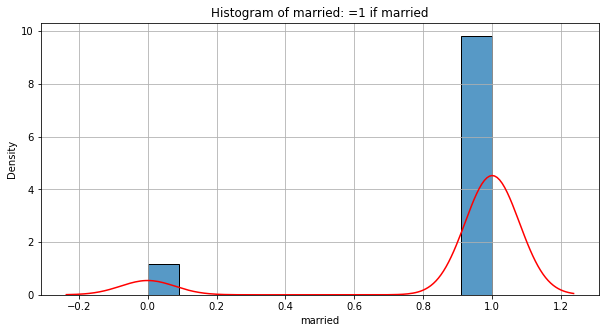

In [15]:
# Plotting married histogram with density curve
plt.figure(figsize = (10,5))
plt.title("Histogram of married: =1 if married")
sns.histplot(org_data.married, stat = "density")
sns.kdeplot(org_data.married, color = "red")
plt.grid(True)

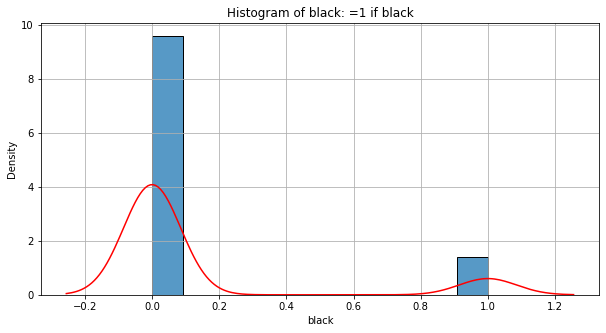

In [16]:
# Plotting black histogram with density curve
plt.figure(figsize = (10,5))
plt.title("Histogram of black: =1 if black")
sns.histplot(org_data.black, stat = "density")
sns.kdeplot(org_data.black, color = "red")
plt.grid(True)

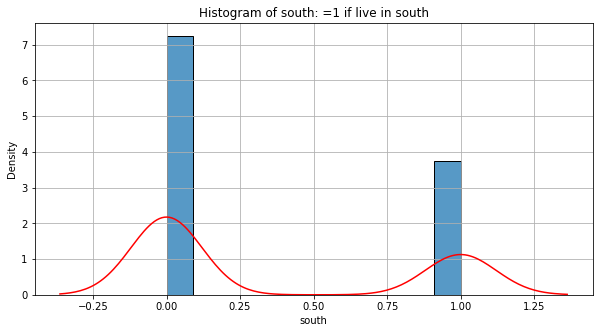

In [17]:
# Plotting south histogram with density curve
plt.figure(figsize = (10,5))
plt.title("Histogram of south: =1 if live in south")
sns.histplot(org_data.south, stat = "density")
sns.kdeplot(org_data.south, color = "red")
plt.grid(True)

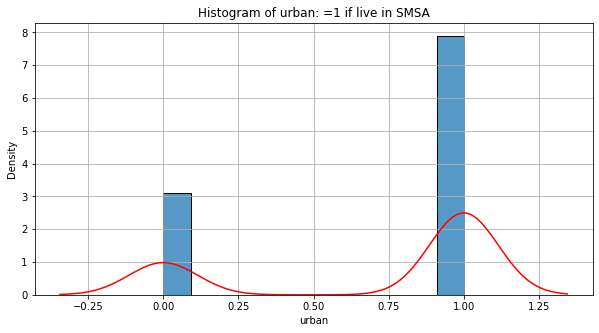

In [18]:
# Plotting urban histogram with density curve
plt.figure(figsize = (10,5))
plt.title("Histogram of urban: =1 if live in SMSA")
sns.histplot(org_data.urban, stat = "density")
sns.kdeplot(org_data.urban, color = "red")
plt.grid(True)

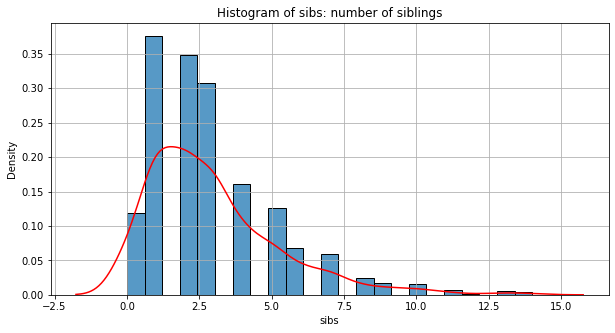

In [19]:
# Plotting sibs histogram with density curve
plt.figure(figsize = (10,5))
plt.title("Histogram of sibs: number of siblings")
sns.histplot(org_data.sibs, stat = "density")
sns.kdeplot(org_data.sibs, color = "red")
plt.grid(True)

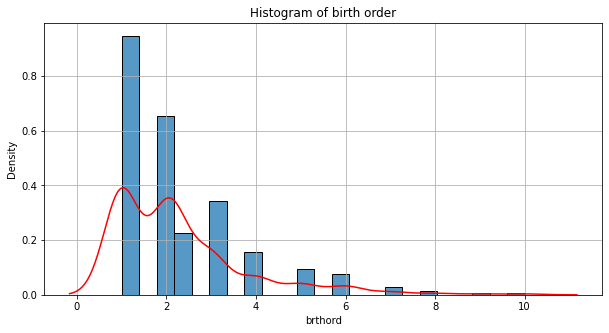

In [20]:
# Plotting brthord histogram with density curve
plt.figure(figsize = (10,5))
plt.title("Histogram of birth order")
sns.histplot(org_data.brthord, stat = "density")
sns.kdeplot(org_data.brthord, color = "red")
plt.grid(True)

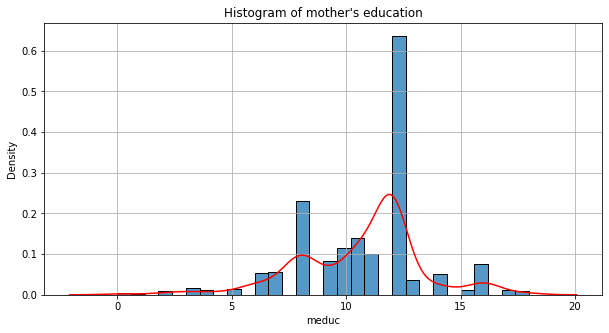

In [21]:
# Plotting meduc histogram with density curve
plt.figure(figsize = (10,5))
plt.title("Histogram of mother's education")
sns.histplot(org_data.meduc, stat = "density")
sns.kdeplot(org_data.meduc, color = "red")
plt.grid(True)

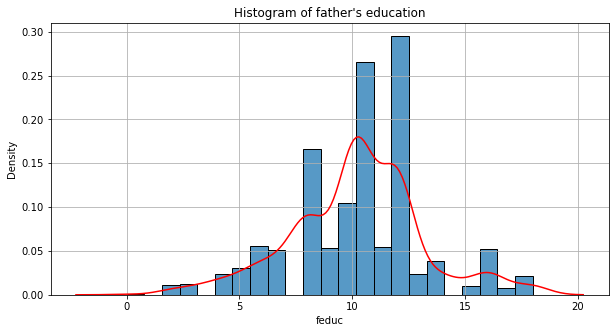

In [22]:
# Plotting feduc histogram with density curve
plt.figure(figsize = (10,5))
plt.title("Histogram of father's education")
sns.histplot(org_data.feduc, stat = "density")
sns.kdeplot(org_data.feduc, color = "red")
plt.grid(True)

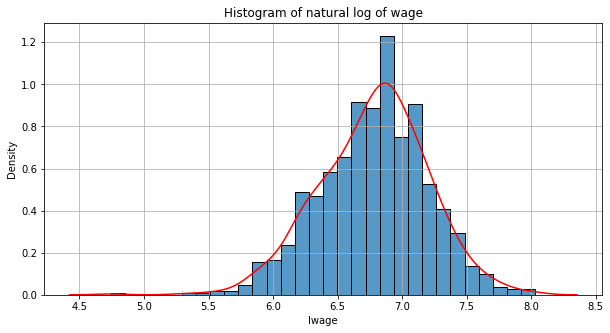

In [23]:
# Plotting lwage histogram with density curve
plt.figure(figsize = (10,5))
plt.title("Histogram of natural log of wage")
sns.histplot(org_data.lwage, stat = "density")
sns.kdeplot(org_data.lwage, color = "red")
plt.grid(True)

### Quantile Plots

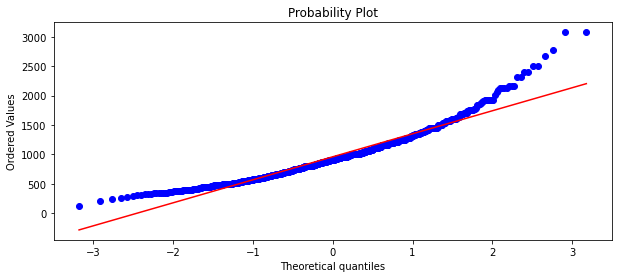

In [24]:
# Plotting wage quantile plot
plt.figure(figsize = (10,4))
stats.probplot(org_data.wage, dist="norm", plot=plt)
plt.show()

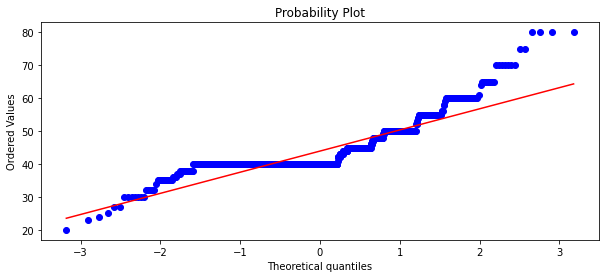

In [25]:
# Plotting hours quantile plot
plt.figure(figsize = (10,4))
stats.probplot(org_data.hours, dist="norm", plot=plt)
plt.show()

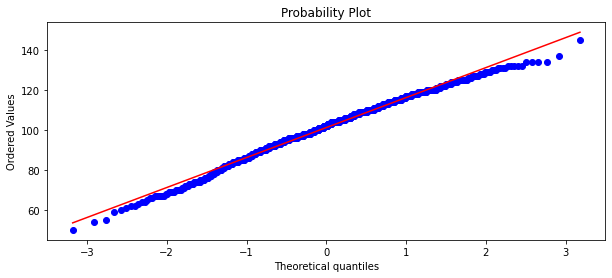

In [26]:
# Plotting IQ quantile plot
plt.figure(figsize = (10,4))
stats.probplot(org_data.IQ, dist="norm", plot=plt)
plt.show()

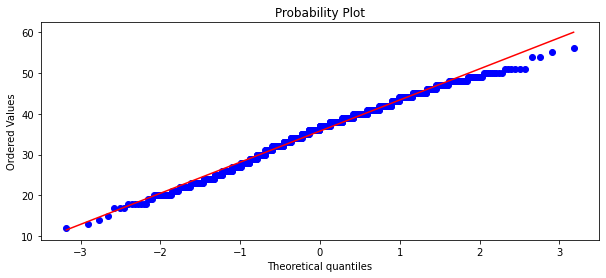

In [27]:
# Plotting KWW quantile plot
plt.figure(figsize = (10,4))
stats.probplot(org_data.KWW, dist="norm", plot=plt)
plt.show()

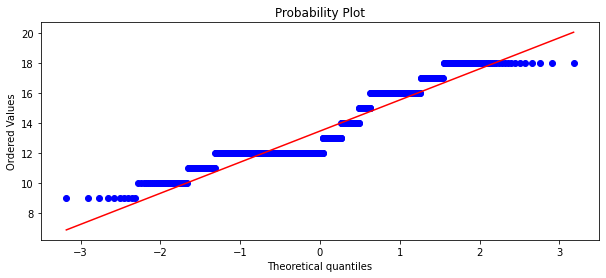

In [28]:
# Plotting educ quantile plot
plt.figure(figsize = (10,4))
stats.probplot(org_data.educ, dist="norm", plot=plt)
plt.show()

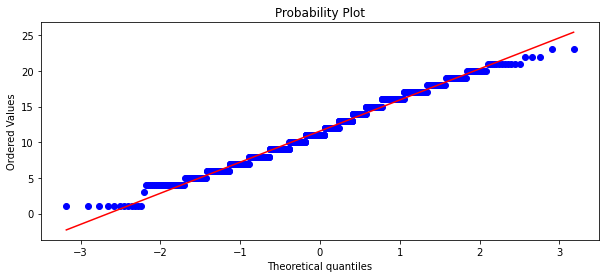

In [29]:
# Plotting exper quantile plot
plt.figure(figsize = (10,4))
stats.probplot(org_data.exper, dist="norm", plot=plt)
plt.show()

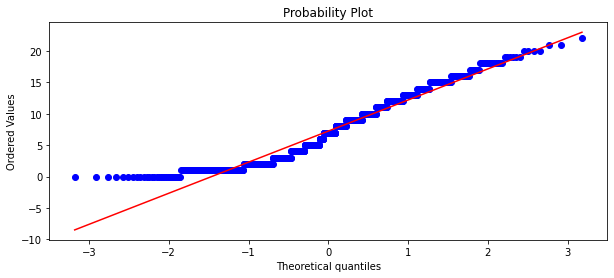

In [30]:
# Plotting tenure quantile plot
plt.figure(figsize = (10,4))
stats.probplot(org_data.tenure, dist="norm", plot=plt)
plt.show()

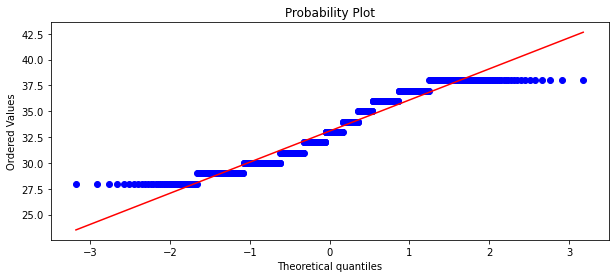

In [31]:
# Plotting age quantile plot
plt.figure(figsize = (10,4))
stats.probplot(org_data.age, dist="norm", plot=plt)
plt.show()

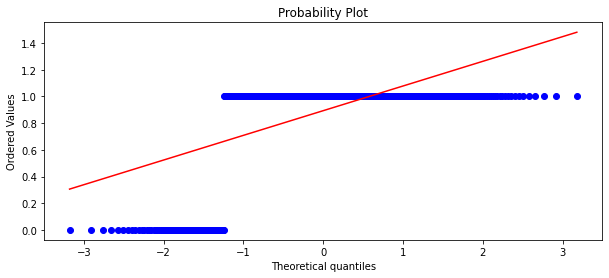

In [32]:
# Plotting married quantile plot
plt.figure(figsize = (10,4))
stats.probplot(org_data.married, dist="norm", plot=plt)
plt.show()

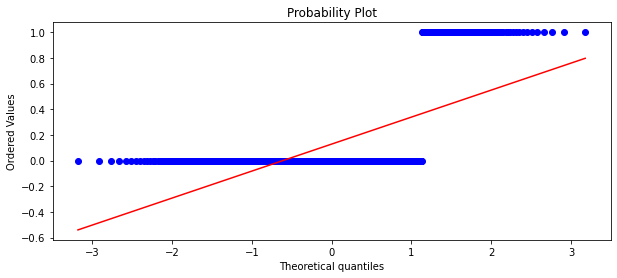

In [33]:
# Plotting black quantile plot
plt.figure(figsize = (10,4))
stats.probplot(org_data.black, dist="norm", plot=plt)
plt.show()

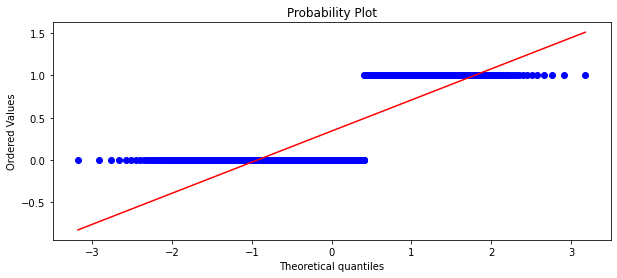

In [34]:
# Plotting south quantile plot
plt.figure(figsize = (10,4))
stats.probplot(org_data.south, dist="norm", plot=plt)
plt.show()

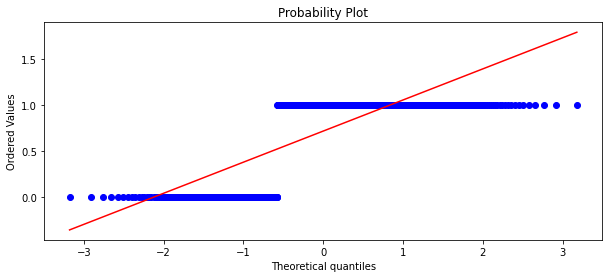

In [35]:
# Plotting urban quantile plot
plt.figure(figsize = (10,4))
stats.probplot(org_data.urban, dist="norm", plot=plt)
plt.show()

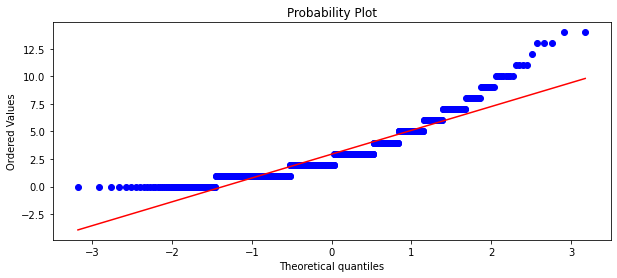

In [36]:
# Plotting sibs quantile plot
plt.figure(figsize = (10,4))
stats.probplot(org_data.sibs, dist="norm", plot=plt)
plt.show()

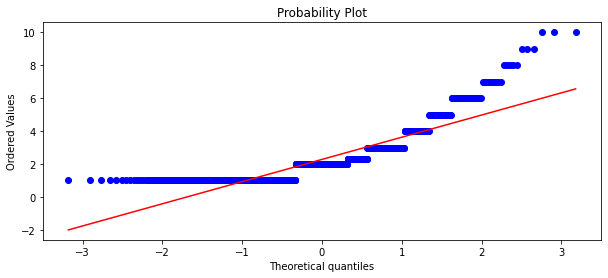

In [37]:
# Plotting brthord quantile plot
plt.figure(figsize = (10,4))
stats.probplot(org_data.brthord, dist="norm", plot=plt)
plt.show()

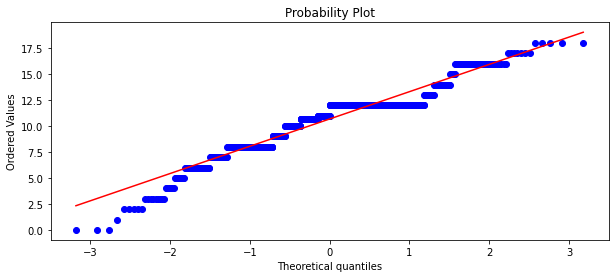

In [38]:
# Plotting meduc quantile plot
plt.figure(figsize = (10,4))
stats.probplot(org_data.meduc, dist="norm", plot=plt)
plt.show()

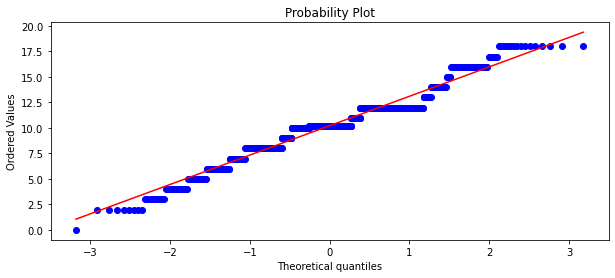

In [39]:
# Plotting feduc quantile plot
plt.figure(figsize = (10,4))
stats.probplot(org_data.feduc, dist="norm", plot=plt)
plt.show()

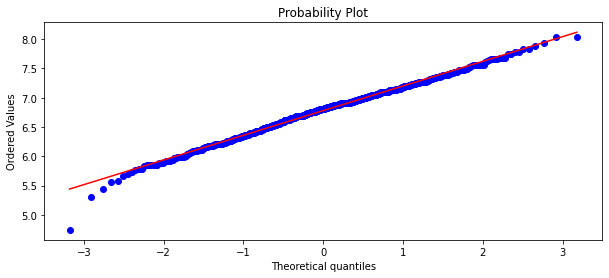

In [40]:
# Plotting lwage quantile plot
plt.figure(figsize = (10,4))
stats.probplot(org_data.lwage, dist="norm", plot=plt)
plt.show()

### Boxplot

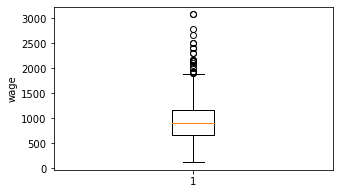

In [41]:
#Plotting Boxplot For wage
plt.figure(figsize=(5,3))
plt.boxplot(org_data.wage)
plt.ylabel("wage")
plt.show()

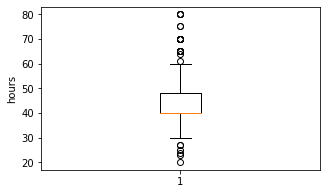

In [42]:
#Plotting Boxplot For hours
plt.figure(figsize=(5,3))
plt.boxplot(org_data.hours)
plt.ylabel("hours")
plt.show()

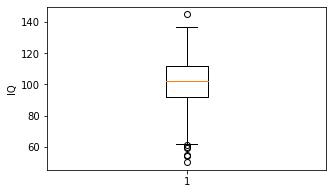

In [43]:
#Plotting Boxplot For IQ
plt.figure(figsize=(5,3))
plt.boxplot(org_data.IQ)
plt.ylabel("IQ")
plt.show()

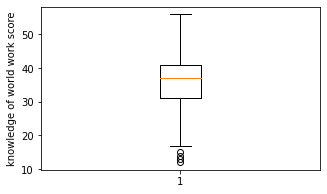

In [44]:
#Plotting Boxplot For KWW
plt.figure(figsize=(5,3))
plt.boxplot(org_data.KWW)
plt.ylabel("knowledge of world work score")
plt.show()

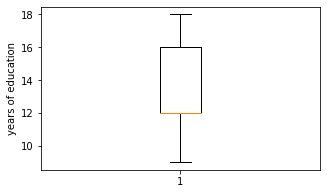

In [45]:
#Plotting Boxplot For educ
plt.figure(figsize=(5,3))
plt.boxplot(org_data.educ)
plt.ylabel("years of education")
plt.show()

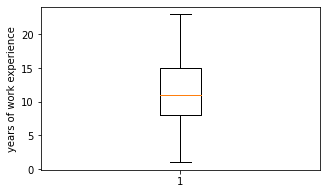

In [46]:
#Plotting Boxplot For exper
plt.figure(figsize=(5,3))
plt.boxplot(org_data.exper)
plt.ylabel("years of work experience")
plt.show()

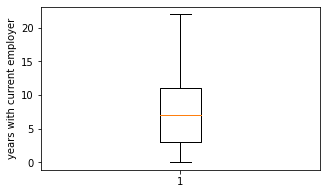

In [47]:
#Plotting Boxplot For tenure
plt.figure(figsize=(5,3))
plt.boxplot(org_data.tenure)
plt.ylabel("years with current employer")
plt.show()

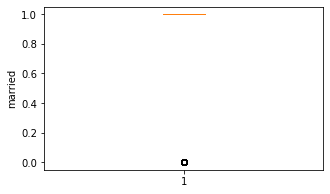

In [48]:
#Plotting Boxplot For married
plt.figure(figsize=(5,3))
plt.boxplot(org_data.married)
plt.ylabel("married")
plt.show()

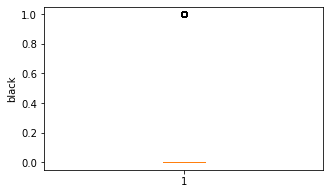

In [49]:
#Plotting Boxplot For black
plt.figure(figsize=(5,3))
plt.boxplot(org_data.black)
plt.ylabel("black")
plt.show()

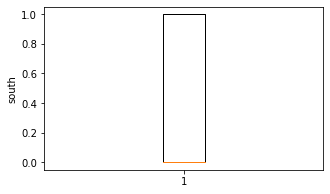

In [50]:
#Plotting Boxplot For south
plt.figure(figsize=(5,3))
plt.boxplot(org_data.south)
plt.ylabel("south")
plt.show()

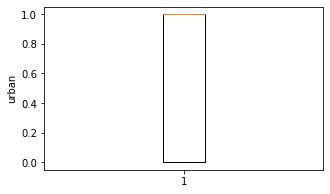

In [51]:
#Plotting Boxplot For urban
plt.figure(figsize=(5,3))
plt.boxplot(org_data.urban)
plt.ylabel("urban")
plt.show()

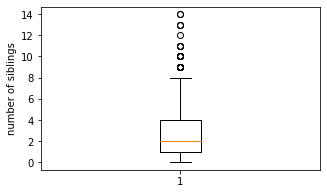

In [52]:
#Plotting Boxplot For sibs
plt.figure(figsize=(5,3))
plt.boxplot(org_data.sibs)
plt.ylabel("number of siblings")
plt.show()

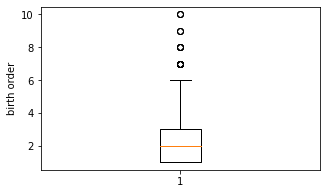

In [53]:
#Plotting Boxplot For brthord
plt.figure(figsize=(5,3))
plt.boxplot(org_data.brthord)
plt.ylabel("birth order")
plt.show()

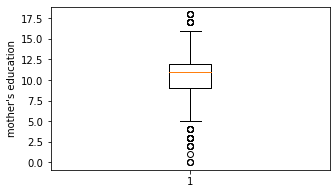

In [54]:
#Plotting Boxplot For meduc
plt.figure(figsize=(5,3))
plt.boxplot(org_data.meduc)
plt.ylabel("mother's education")
plt.show()

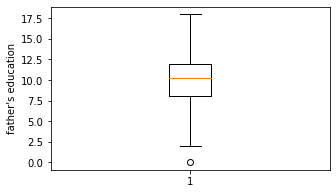

In [55]:
#Plotting Boxplot For feduc
plt.figure(figsize=(5,3))
plt.boxplot(org_data.feduc)
plt.ylabel("father's education")
plt.show()

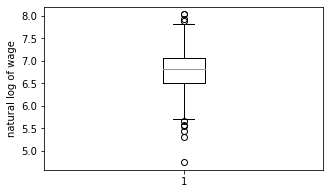

In [56]:
#Plotting Boxplot For lwage
plt.figure(figsize=(5,3))
plt.boxplot(org_data.lwage)
plt.ylabel("natural log of wage")
plt.show()

**Interpretation:** From the graphs we generated above, we can tell that most of the variables are normally distributed such as "IQ", "KWW", "exper" and "lwage". And most of the variables such as "IQ", "KWW", "meduc", "feduc" and "lwage" are spread almost equally, with only a few outliers. Since "lwage" is distributed more normally and has more even outliers on both sides, which is saying it is visually better than "wage", we might be considering using "lwage" as the dependent variable later when building the regression model.

### Correlation Plot

<AxesSubplot:>

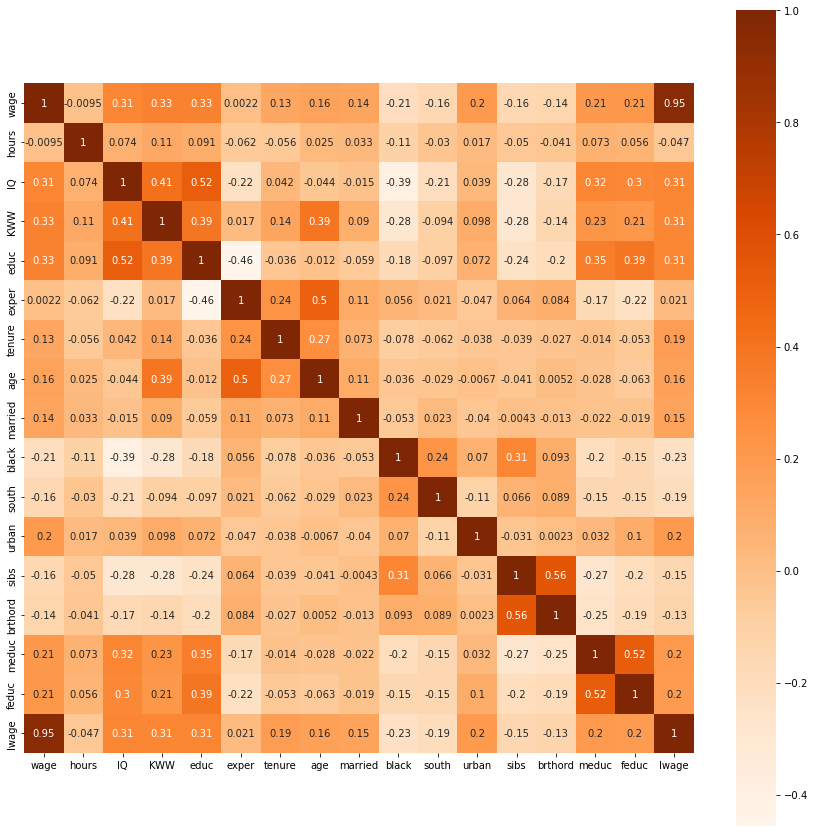

In [57]:
plt.figure(figsize=(15,15))
c = org_data.corr()
sns.heatmap(c,cmap="Oranges",annot=True,square = True)

**Interpretation:** From the correlation plot, we can see that some variables have relative strong correlation such as between IQ and KWW, between IQ and exper, between educ and exper, between exper and age, between sibs and brthord, between meduc and feduc.

### Unusual Features

In [58]:
# Forming the Multiple Linear Regression Function with Every Variable

ols_mod = smf.ols(formula = 'lwage ~ hours+IQ+KWW+educ+exper+tenure+age+married+\n black+south+urban+sibs+brthord+meduc+feduc',data=org_data)
ols_fit = ols_mod.fit()
ols_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     24.09
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           2.09e-56
Time:                        17:11:22   Log-Likelihood:                -362.60
No. Observations:                 935   AIC:                             757.2
Df Residuals:                     919   BIC:                             834.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2358      0.193     27.182      0.000       4.858       5.614
hours         -0.0058      0.002     -3.486      0.001      -0.009      -0.003
IQ             0.0031      0.001      3.005      0.003       0.001       0.005
KWW            0.0033      0.002      1.627      0.104      -0.001       0.007
educ           0.0450      0.008      5.976      0.000       0.030       0.060
exper          0.0108      0.004      2.945      0.003       0.004       0.018
tenure         0.0101      0.002      4.100      0.000       0.005       0.015
age            0.0061      0.005      1.209      0.227      -0.004       0.016
married        0.1931      0.039      4.995      0.000       0.117       0.269
black         -0.1483      0.041     -3.620      0.000      -0.229      -0.068
south         -0.0716      0.026     -2.723      0.007      -0.123      -0.020
urban          0.1786      0.027      6.659      0.000       0.126       0.231
sibs           0.0085      0.007      1.269      0.205      -0.005       0.022
brthord       -0.0167      0.010     -1.753      0.080      -0.035       0.002
meduc          0.0070      0.005      1.333      0.183      -0.003       0.017
feduc          0.0040      0.005      0.818      0.414      -0.006       0.014
==============================================================================
Omnibus:                       44.517   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.044
Skew:                          -0.218   Prob(JB):                     4.68e-25
Kurtosis:                       4.639   Cond. No.                     2.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [125]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

for i, ax in list(enumerate(org_data)):
    
    outliers = find_outliers_IQR(org_data[ax])
    
    print(ax)

    print('number of outliers: '+ str(len(outliers)))
    print('max outlier value: '+ str(outliers.max()))
    print('min outlier value: '+ str(outliers.min()) + '\n')

wage
number of outliers: 29
max outlier value: 3078
min outlier value: 1899

hours
number of outliers: 28
max outlier value: 80
min outlier value: 20

IQ
number of outliers: 7
max outlier value: 145
min outlier value: 50

KWW
number of outliers: 4
max outlier value: 15
min outlier value: 12

educ
number of outliers: 0
max outlier value: nan
min outlier value: nan

exper
number of outliers: 0
max outlier value: nan
min outlier value: nan

tenure
number of outliers: 0
max outlier value: nan
min outlier value: nan

age
number of outliers: 0
max outlier value: nan
min outlier value: nan

married
number of outliers: 100
max outlier value: 0
min outlier value: 0

black
number of outliers: 120
max outlier value: 1
min outlier value: 1

south
number of outliers: 0
max outlier value: nan
min outlier value: nan

urban
number of outliers: 0
max outlier value: nan
min outlier value: nan

sibs
number of outliers: 29
max outlier value: 14
min outlier value: 9

brthord
number of outliers: 21
max outl

In [59]:
# Studentized Residuals

studentized_resid = ols_fit.get_influence().resid_studentized
print(studentized_resid)

[-1.83926613e-01 -1.59112513e+00 -8.85306692e-01 -1.01527800e+00
 -9.48268864e-01  9.52335701e-01  4.56685000e-02 -6.77579670e-01
  8.04359567e-01 -3.39186566e-01 -8.33895814e-01 -4.42934561e-02
  7.44169180e-01  6.79790174e-01  9.89694283e-01  5.12467746e-01
  7.03491617e-01 -2.08283253e-01 -2.99554535e-01 -1.81814100e+00
  6.60846535e-01  9.38877498e-01  1.06640185e-01  1.00289428e+00
 -3.26200058e-01  1.03550002e+00  4.06574728e-01 -9.22822235e-01
  4.07072369e-01 -1.87288831e+00  1.14022042e-01  9.31513717e-01
  3.60568338e+00 -1.34664826e+00  7.14399450e-01 -3.43382536e-01
  1.76446720e+00  5.00683353e-01 -1.14662162e+00 -2.45240308e-01
 -1.48762007e+00  3.22544480e-02  5.77729016e-01 -3.84642208e-01
  6.24109076e-01 -4.62346021e-02 -1.23731868e+00  3.51204743e-01
  4.74757825e-01 -7.14455630e-01 -3.38618525e-01 -5.53001347e-01
  2.06534496e+00 -2.07518939e-01 -1.93807775e+00 -8.40083185e-01
  3.03160097e-01  1.05203395e+00  6.99471933e-01 -5.72146113e-01
  9.77329387e-01  5.99051

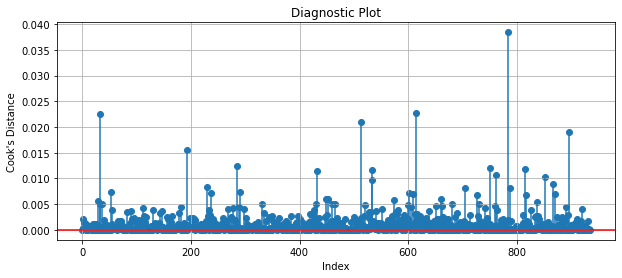

In [60]:
cooks_distance = ols_fit.get_influence().cooks_distance
plt.figure(figsize = (10, 4))
plt.scatter(org_data.index, cooks_distance[0])
plt.axhline(0, color = 'red')
plt.vlines(x = org_data.index, ymin = 0, ymax = cooks_distance[0])
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')
plt.title("Diagnostic Plot")
plt.grid(True)

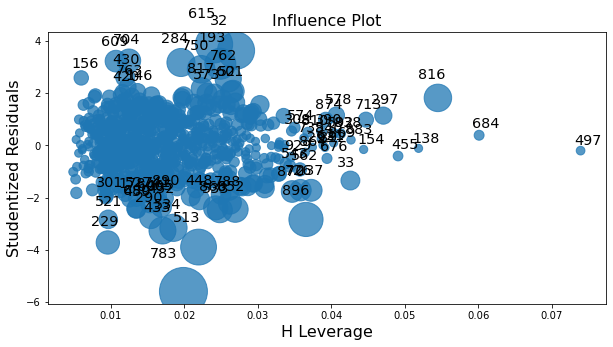

In [61]:
# Visualize the Influentials
fig, ax = plt.subplots(figsize=(10,5))
fig = sm.graphics.influence_plot(ols_fit, ax = ax, criterion="cooks")

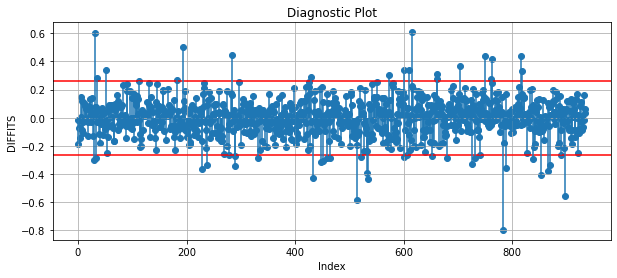

In [62]:
# the dffits attribute returns a cutoff and the diagnostic values
dffits, threshold = ols_fit.get_influence().dffits

plt.figure(figsize = (10, 4))
plt.scatter(org_data.index, dffits)
plt.axhline(threshold, color = 'red')
plt.axhline(-threshold, color = 'red')
plt.vlines(x = org_data.index, ymin = 0, ymax = dffits)
plt.xlabel('Index')
plt.ylabel('DIFFITS')
plt.title("Diagnostic Plot")
plt.grid(True)

In [63]:
# Drop observation greater than the cooks cutoff
mydata = org_data[cooks_distance[0]<4/len(cooks_distance[0])]

ols_new = smf.ols(formula = 'lwage ~ hours+IQ+KWW+educ+exper+tenure+age+married+\n black+south+urban+sibs+brthord+meduc+feduc',data=mydata)
new_fit = ols_new.fit()

new_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     34.55
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           7.58e-78
Time:                        17:11:25   Log-Likelihood:                -178.55
No. Observations:                 884   AIC:                             389.1
Df Residuals:                     868   BIC:                             465.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2437      0.166     31.551      0.000       4.918       5.570
hours         -0.0059      0.001     -3.994      0.000      -0.009      -0.003
IQ             0.0030      0.001      3.433      0.001       0.001       0.005
KWW            0.0051      0.002      2.901      0.004       0.002       0.009
educ           0.0447      0.006      6.903      0.000       0.032       0.057
exper          0.0106      0.003      3.378      0.001       0.004       0.017
tenure         0.0103      0.002      4.855      0.000       0.006       0.014
age            0.0049      0.004      1.129      0.259      -0.004       0.013
married        0.1730      0.034      5.050      0.000       0.106       0.240
black         -0.1372      0.036     -3.861      0.000      -0.207      -0.067
south         -0.0696      0.023     -3.078      0.002      -0.114      -0.025
urban          0.1844      0.023      8.009      0.000       0.139       0.230
sibs           0.0079      0.006      1.375      0.170      -0.003       0.019
brthord       -0.0169      0.008     -2.035      0.042      -0.033      -0.001
meduc          0.0075      0.005      1.623      0.105      -0.002       0.016
feduc          0.0044      0.004      1.049      0.295      -0.004       0.013
==============================================================================
Omnibus:                        5.479   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                4.223
Skew:                          -0.045   Prob(JB):                        0.121
Kurtosis:                       2.673   Cond. No.                     2.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

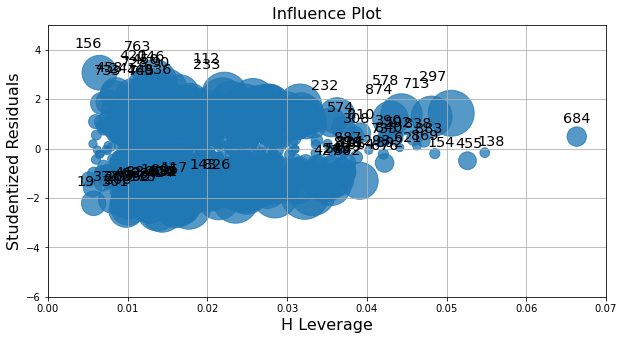

In [64]:
# Visualize the Influentials
fig, ax = plt.subplots(figsize=(10,5))
fig = sm.graphics.influence_plot(new_fit, ax = ax, criterion="cooks")
plt.xlim(0, 0.07)
plt.ylim(-6, 5)
plt.grid()

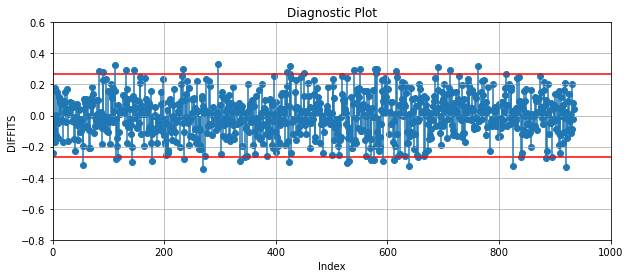

In [65]:
dffits1, threshold1 = new_fit.get_influence().dffits

plt.figure(figsize = (10, 4))
plt.scatter(mydata.index, dffits1)
plt.axhline(threshold1, color = 'red')
plt.axhline(-threshold1, color = 'red')
plt.vlines(x = mydata.index, ymin = 0, ymax = dffits1)
plt.xlabel('Index')
plt.ylabel('DIFFITS')
plt.title("Diagnostic Plot")
plt.xlim(0, 1000)
plt.ylim(-0.8, 0.6)
plt.grid(True)

In [126]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

for i, ax in list(enumerate(mydata)):
    
    outliers = find_outliers_IQR(mydata[ax])
    
    print(ax)

    print('number of outliers: '+ str(len(outliers)))
    print('max outlier value: '+ str(outliers.max()))
    print('min outlier value: '+ str(outliers.min()) + '\n')

wage
number of outliers: 21
max outlier value: 2771
min outlier value: 1850

hours
number of outliers: 62
max outlier value: 80
min outlier value: 20

IQ
number of outliers: 7
max outlier value: 145
min outlier value: 50

KWW
number of outliers: 4
max outlier value: 15
min outlier value: 12

educ
number of outliers: 0
max outlier value: nan
min outlier value: nan

exper
number of outliers: 0
max outlier value: nan
min outlier value: nan

tenure
number of outliers: 0
max outlier value: nan
min outlier value: nan

age
number of outliers: 0
max outlier value: nan
min outlier value: nan

married
number of outliers: 87
max outlier value: 0
min outlier value: 0

black
number of outliers: 109
max outlier value: 1
min outlier value: 1

south
number of outliers: 0
max outlier value: nan
min outlier value: nan

urban
number of outliers: 0
max outlier value: nan
min outlier value: nan

sibs
number of outliers: 26
max outlier value: 14
min outlier value: 9

brthord
number of outliers: 18
max outli

## Non-linearities and Transformations
###  Test for Non-linearities

To detect nonlinearity we inspected plots of observed vs. predicted values or residuals vs. predicted values. 
The desired outcome is that points are symmetrically distributed around a diagonal line in the former plot or around a horizontal line in the latter one. 

In [66]:
mydata.describe()

wage       hours          IQ         KWW        educ  \
count   884.000000  884.000000  884.000000  884.000000  884.000000   
mean    958.575792   43.778281  101.255656   35.750000   13.457014   
std     363.766331    6.902536   15.025393    7.596845    2.190106   
min     345.000000   20.000000   50.000000   12.000000    9.000000   
25%     692.000000   40.000000   92.000000   31.000000   12.000000   
50%     912.500000   40.000000  102.000000   37.000000   12.000000   
75%    1155.000000   46.000000  112.000000   41.000000   16.000000   
max    2771.000000   80.000000  145.000000   56.000000   18.000000   

            exper      tenure         age     married       black       south  \
count  884.000000  884.000000  884.000000  884.000000  884.000000  884.000000   
mean    11.590498    7.389140   33.073529    0.901584    0.123303    0.332579   
std      4.356919    5.041407    3.090962    0.298045    0.328971    0.471404   
min      1.000000    0.000000   28.000000    0.000000    0.000000    0.000000   
25%      8.000000    3.000000   30.000000    1.000000    0.000000    0.000000   
50%     11.000000    7.000000   33.000000    1.000000    0.000000    0.000000   
75%     15.000000   11.000000   36.000000    1.000000    0.000000    1.000000   
max     23.000000   22.000000   38.000000    1.000000    1.000000    1.000000   

            urban        sibs     brthord       meduc       feduc       lwage  
count  884.000000  884.000000  884.000000  884.000000  884.000000  884.000000  
mean     0.720588    2.917421    2.258482   10.700394   10.223466    6.796159  
std      0.448964    2.286147    1.497682    2.685455    2.931928    0.374453  
min      0.000000    0.000000    1.000000    0.000000    0.000000    5.843544  
25%      0.000000    1.000000    1.000000    9.000000    8.000000    6.539586  
50%      1.000000    2.000000    2.000000   11.500000   10.217274    6.816188  
75%      1.000000    4.000000    3.000000   12.000000   12.000000    7.051856  
max      1.000000   14.000000   10.000000   18.000000   18.000000    7.926963

In [67]:
mydata.columns

Index(['wage', 'hours', 'IQ', 'KWW', 'educ', 'exper', 'tenure', 'age',
       'married', 'black', 'south', 'urban', 'sibs', 'brthord', 'meduc',
       'feduc', 'lwage'],
      dtype='object')

In [68]:
# Attach Data Set

def attach(mydata):
    for col in mydata.columns:
        globals()[col] = mydata[col]

mydata = pd.DataFrame(mydata)
attach(mydata)

In [69]:
## packages used
%matplotlib inline
%config InlineBackend.figure_format ='retina'

import statsmodels.stats.api as sms
import statsmodels.api as sm
import pylab as py

sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

In [70]:
## set X and Y
X = pd.DataFrame(mydata, columns=['hours', 'IQ', 'KWW', 'educ', 'exper', 'tenure', 'age','married', 
                                  'black', 'south', 'urban', 'sibs', 'brthord', 'meduc','feduc'])
Y = pd.DataFrame(mydata,columns=['lwage'])

## regression
X_constant = sm.add_constant(X)
lin_reg = sm.OLS(Y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     34.55
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           7.58e-78
Time:                        17:11:27   Log-Likelihood:                -178.55
No. Observations:                 884   AIC:                             389.1
Df Residuals:                     868   BIC:                             465.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2437      0.166     31.551      0.000       4.918       5.570
hours         -0.0059      0.001     -3.994      0.000      -0.009      -0.003
IQ             0.0030      0.001      3.433      0.001       0.001       0.005
KWW            0.0051      0.002      2.901      0.004       0.002       0.009
educ           0.0447      0.006      6.903      0.000       0.032       0.057
exper          0.0106      0.003      3.378      0.001       0.004       0.017
tenure         0.0103      0.002      4.855      0.000       0.006       0.014
age            0.0049      0.004      1.129      0.259      -0.004       0.013
married        0.1730      0.034      5.050      0.000       0.106       0.240
black         -0.1372      0.036     -3.861      0.000      -0.207      -0.067
south         -0.0696      0.023     -3.078      0.002      -0.114      -0.025
urban          0.1844      0.023      8.009      0.000       0.139       0.230
sibs           0.0079      0.006      1.375      0.170      -0.003       0.019
brthord       -0.0169      0.008     -2.035      0.042      -0.033      -0.001
meduc          0.0075      0.005      1.623      0.105      -0.002       0.016
feduc          0.0044      0.004      1.049      0.295      -0.004       0.013
==============================================================================
Omnibus:                        5.479   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                4.223
Skew:                          -0.045   Prob(JB):                        0.121
Kurtosis:                       2.673   Cond. No.                     2.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

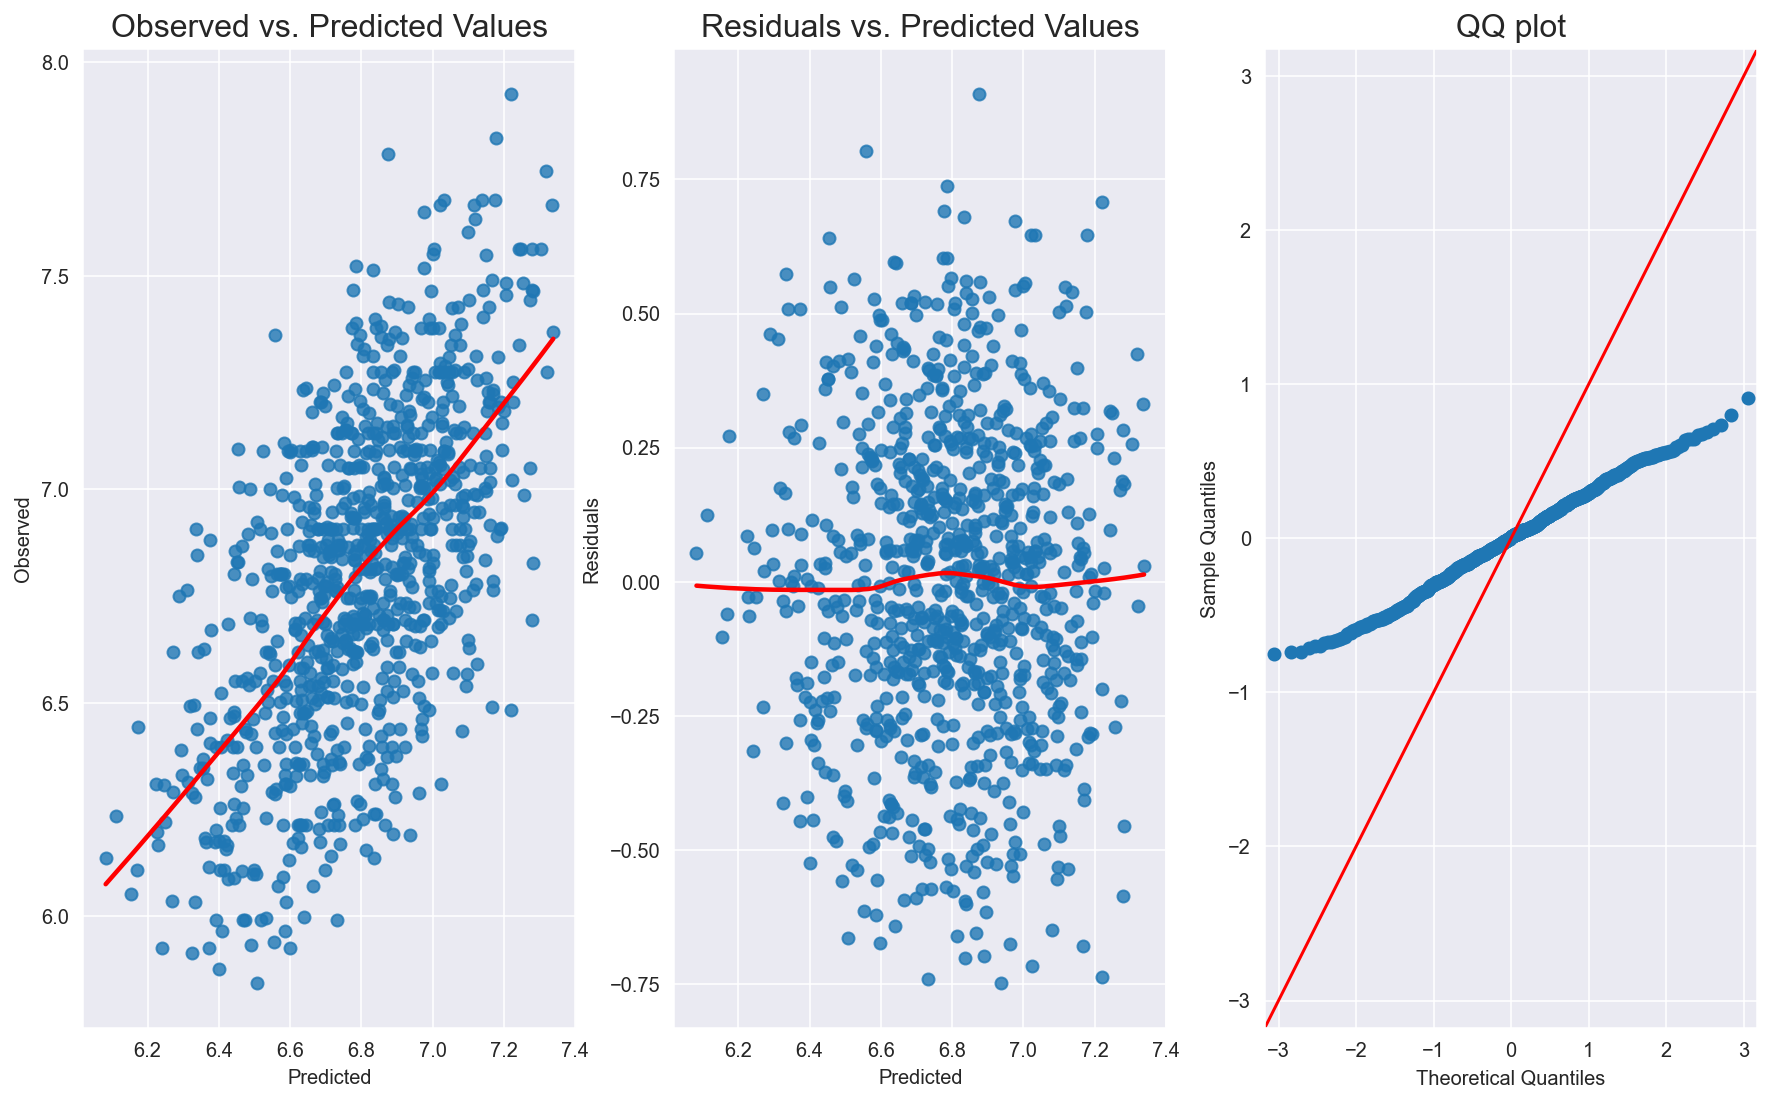

In [112]:
def linearity_test(model, y):
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,3)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
    sm.qqplot(resids, line ='45', ax=ax[2])
    ax[2].set_title('QQ plot', fontsize=16)
    ax[2].set(xlabel='Theoretical Quantiles', ylabel='Sample Quantiles')

def R_result(results):
    print("original R-Squared equals to %s" % results.rsquared)
    
linearity_test(lin_reg, Y)  



original R-Squared equals to 0.9718732284067578


0.16789944414389668

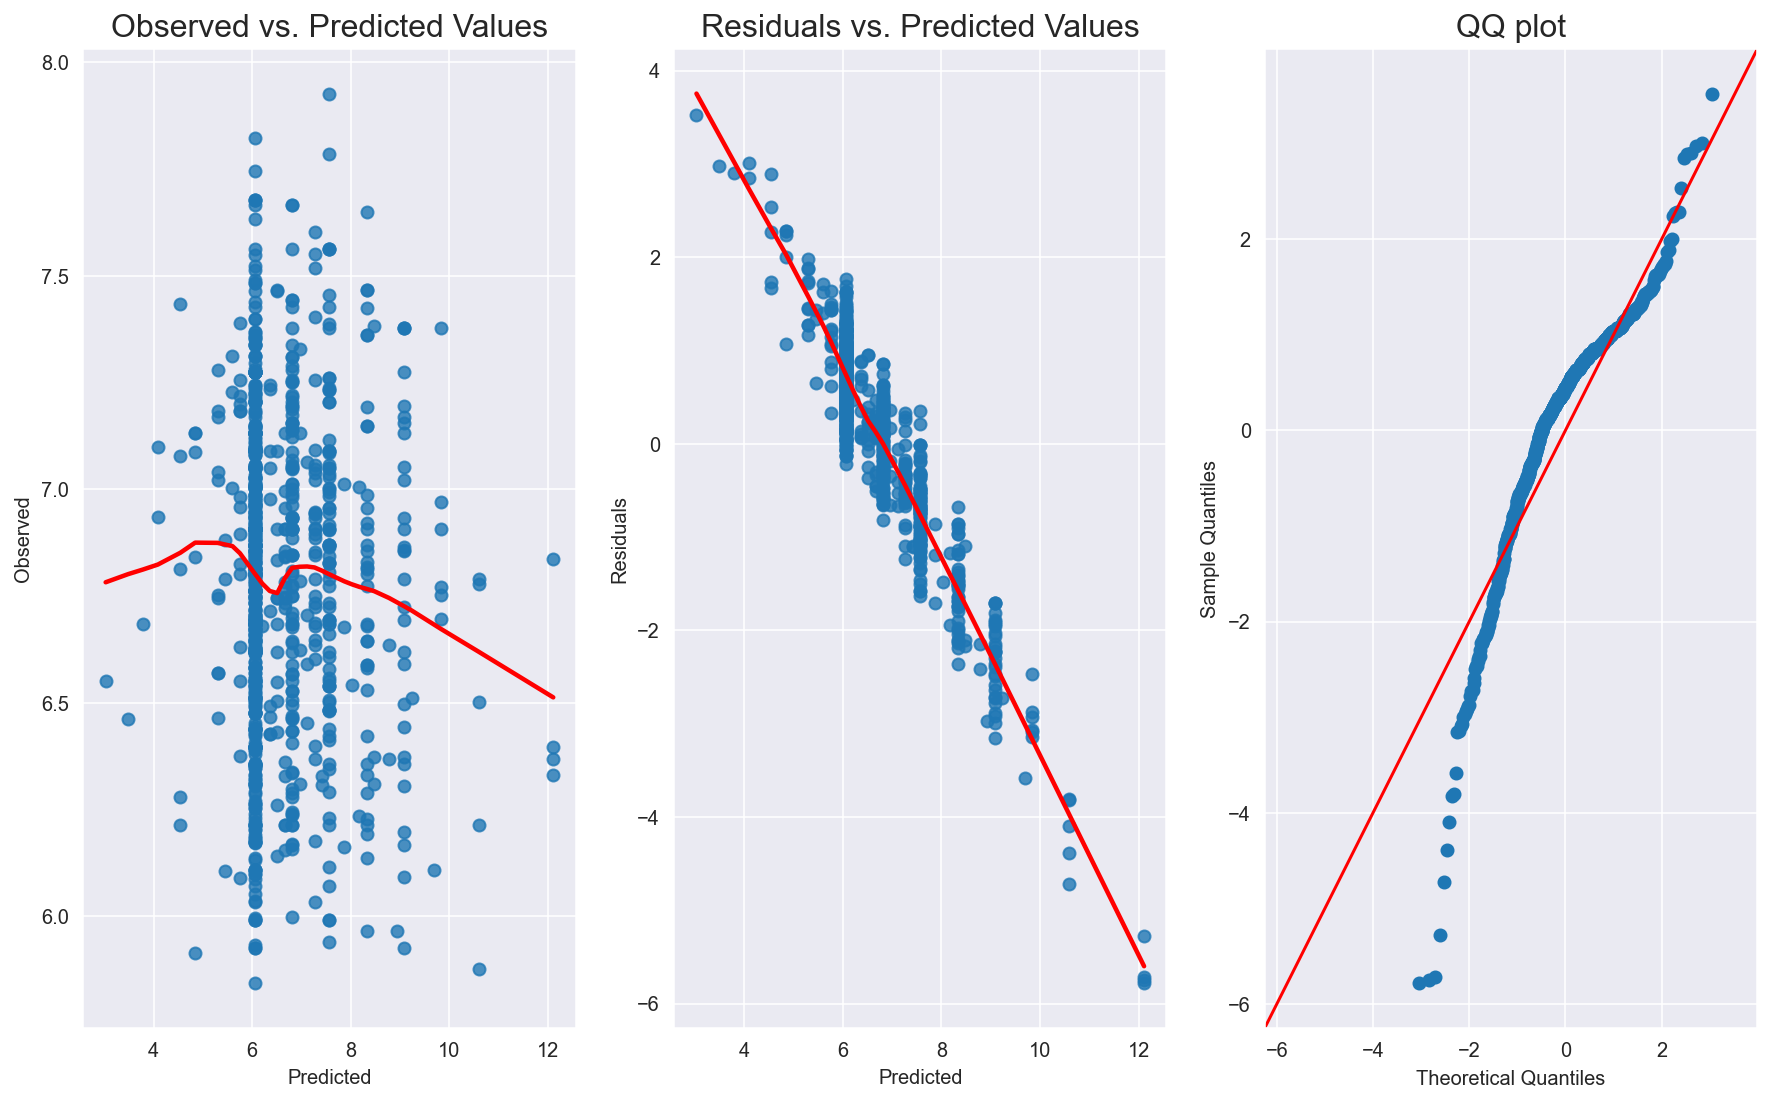

In [113]:
# testing non-linearity for average weekly hours
X1 = pd.DataFrame(hours)
Y1 = pd.DataFrame(lwage)
reg_hours = sm.OLS(Y1,X1).fit()
R_result(reg_hours)
linearity_test(reg_hours, Y1)  
reg_hours.summary()
reg_hours.resid.mean()

The inspection of the plots shows that the linearity assumption is not satisfied.

original R-Squared equals to 0.981437997401273


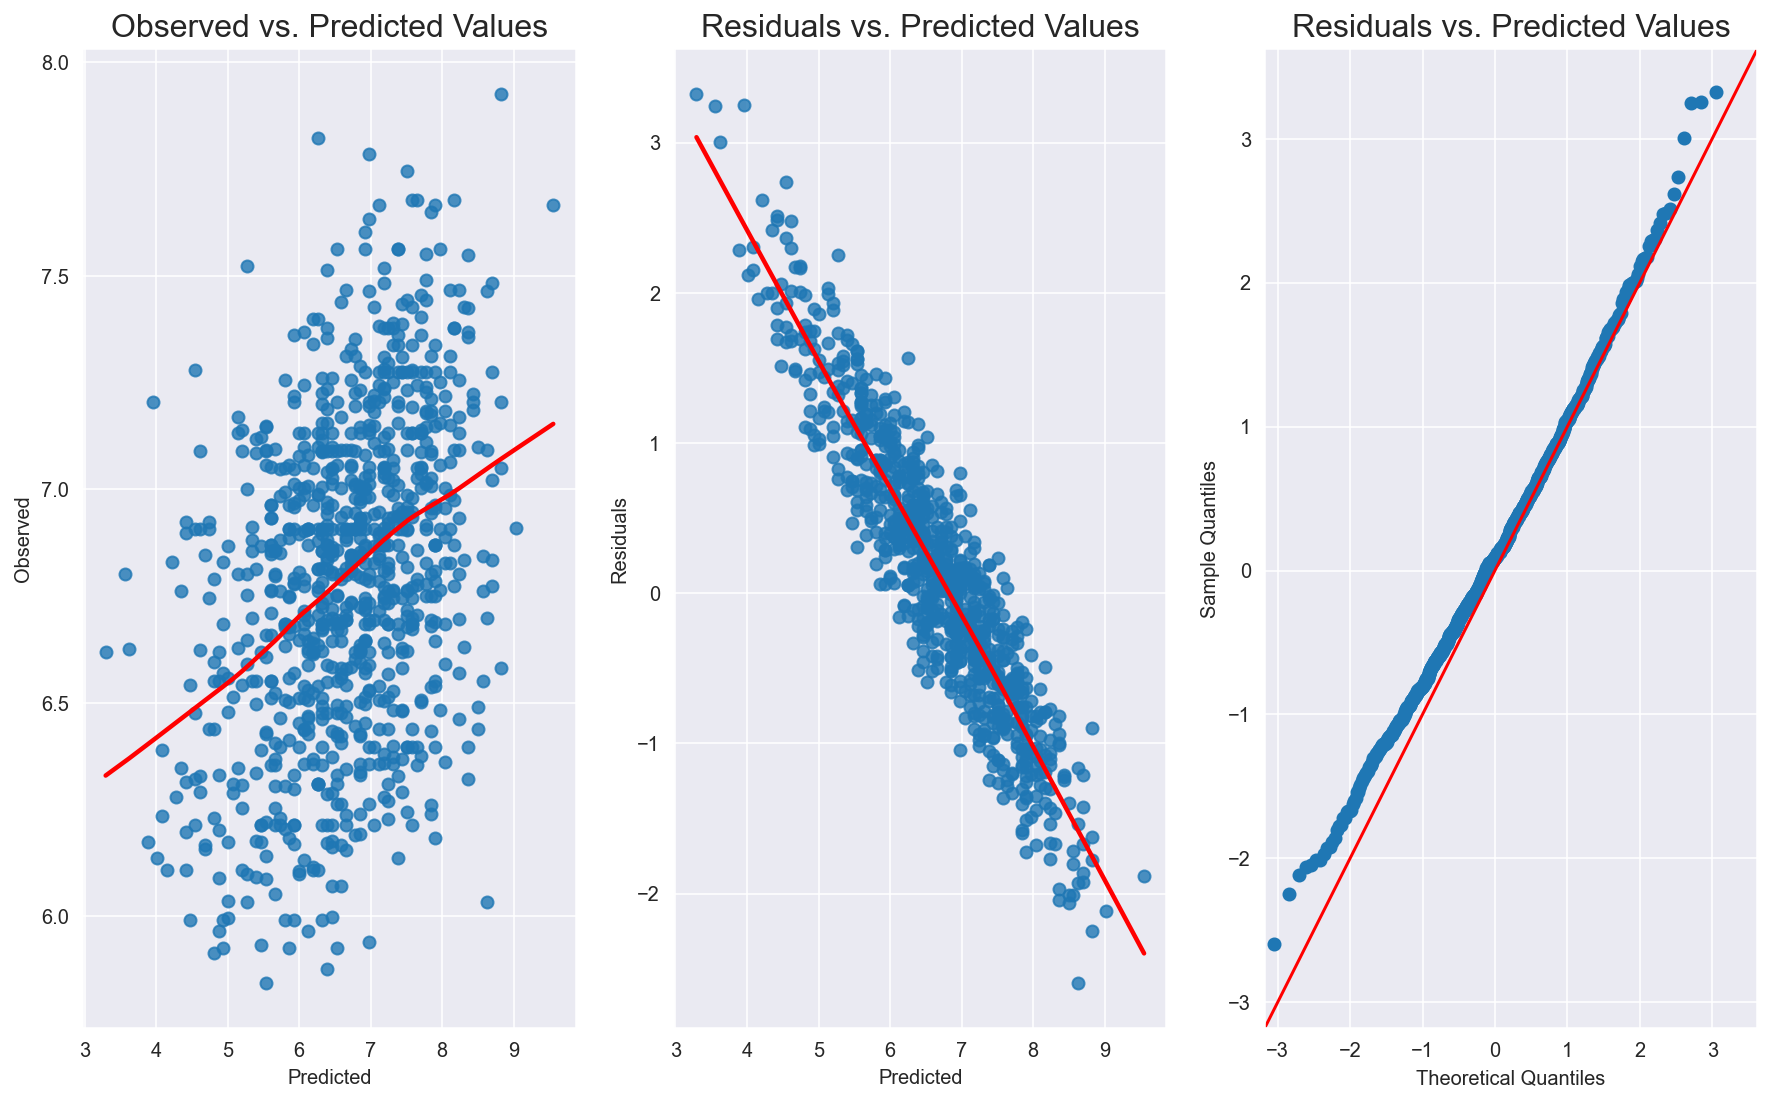

In [73]:
# testing non-linearity for IQ score
X2 = pd.DataFrame(IQ)
Y2 = pd.DataFrame(lwage)
reg_IQ = sm.OLS(Y2,X2).fit()
R_result(reg_IQ)
linearity_test(reg_IQ, Y2)  

The inspection of the plots shows that the linearity assumption is satisfied.

original R-Squared equals to 0.9625398305382904


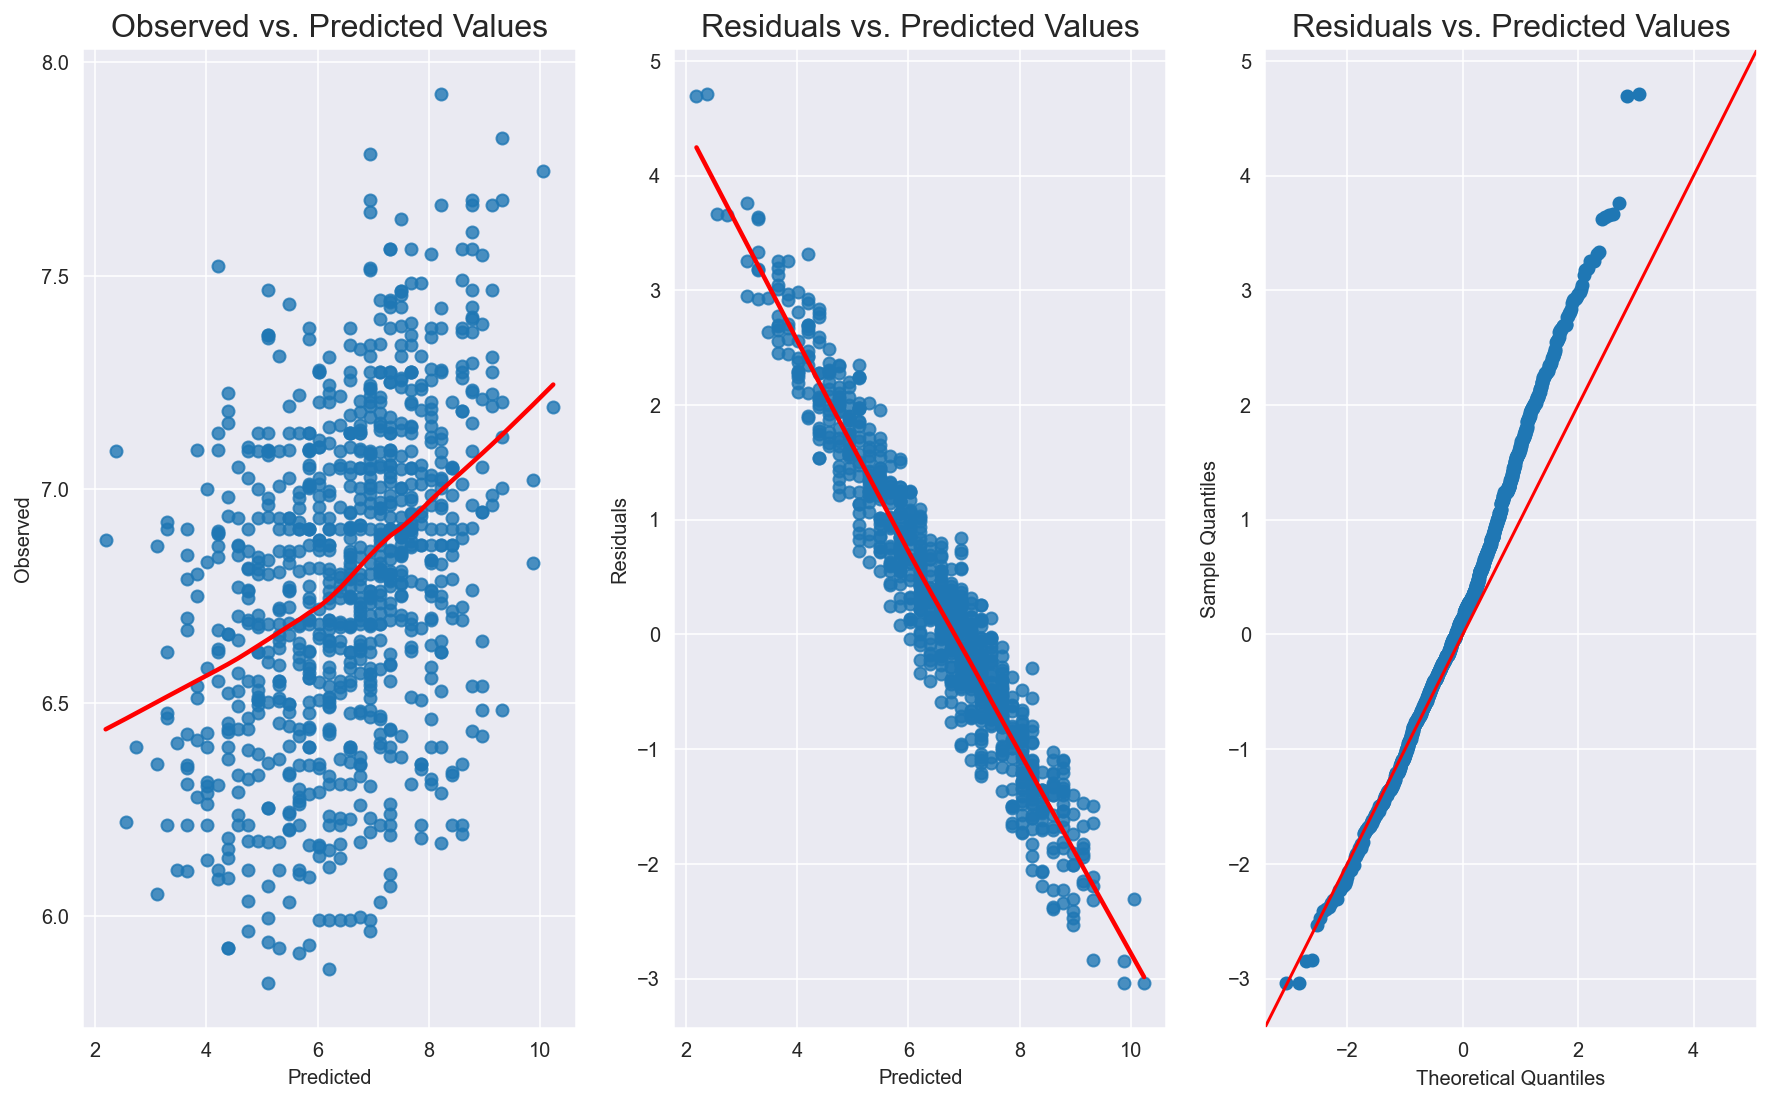

In [74]:
# testing non-linearity for knowledge of world work score
X3 = pd.DataFrame(KWW)
Y3 = pd.DataFrame(lwage)
reg_KWW = sm.OLS(Y3,X3).fit()
R_result(reg_KWW)
linearity_test(reg_KWW, Y3)  

original R-Squared equals to 0.9777374599693456


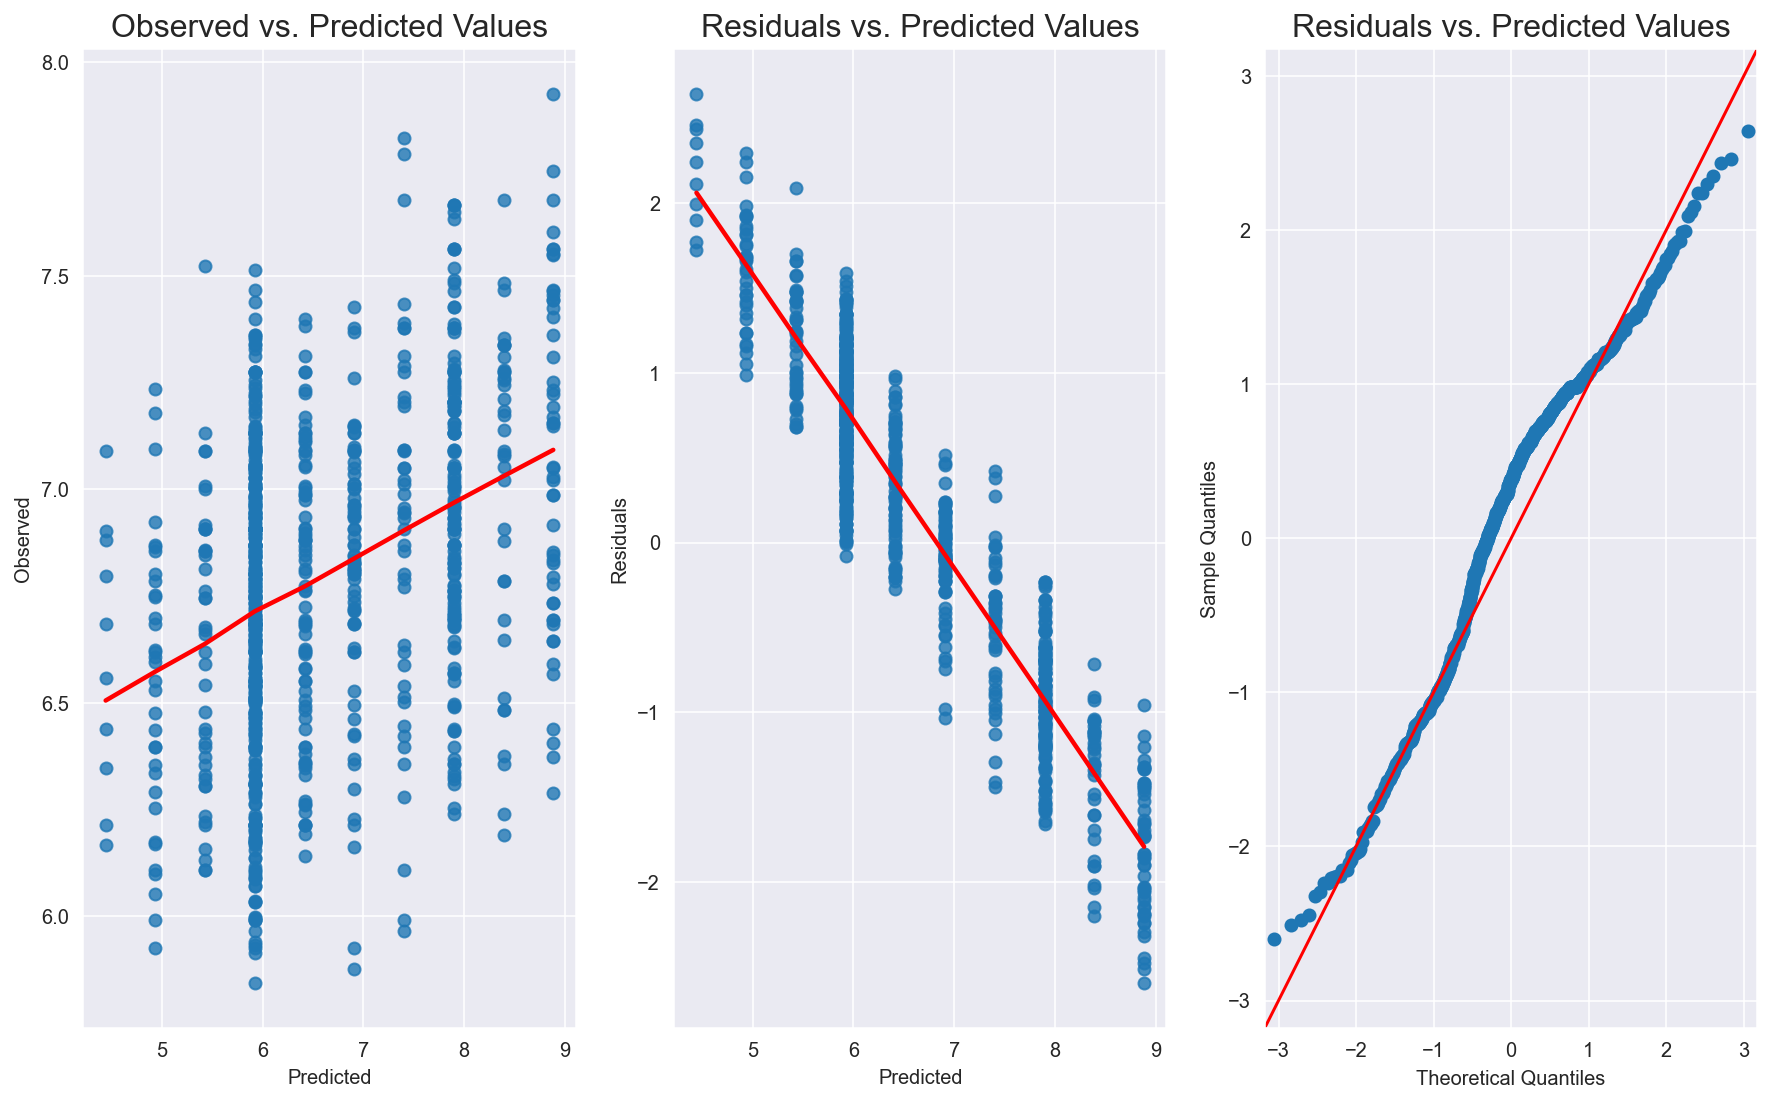

In [75]:
# testing non-linearity for knowledge of years of education
X4 = pd.DataFrame(educ)
Y4 = pd.DataFrame(lwage)
reg_educ = sm.OLS(Y4,X4).fit()
R_result(reg_educ)
linearity_test(reg_educ, Y4)  

original R-Squared equals to 0.8745887846233761


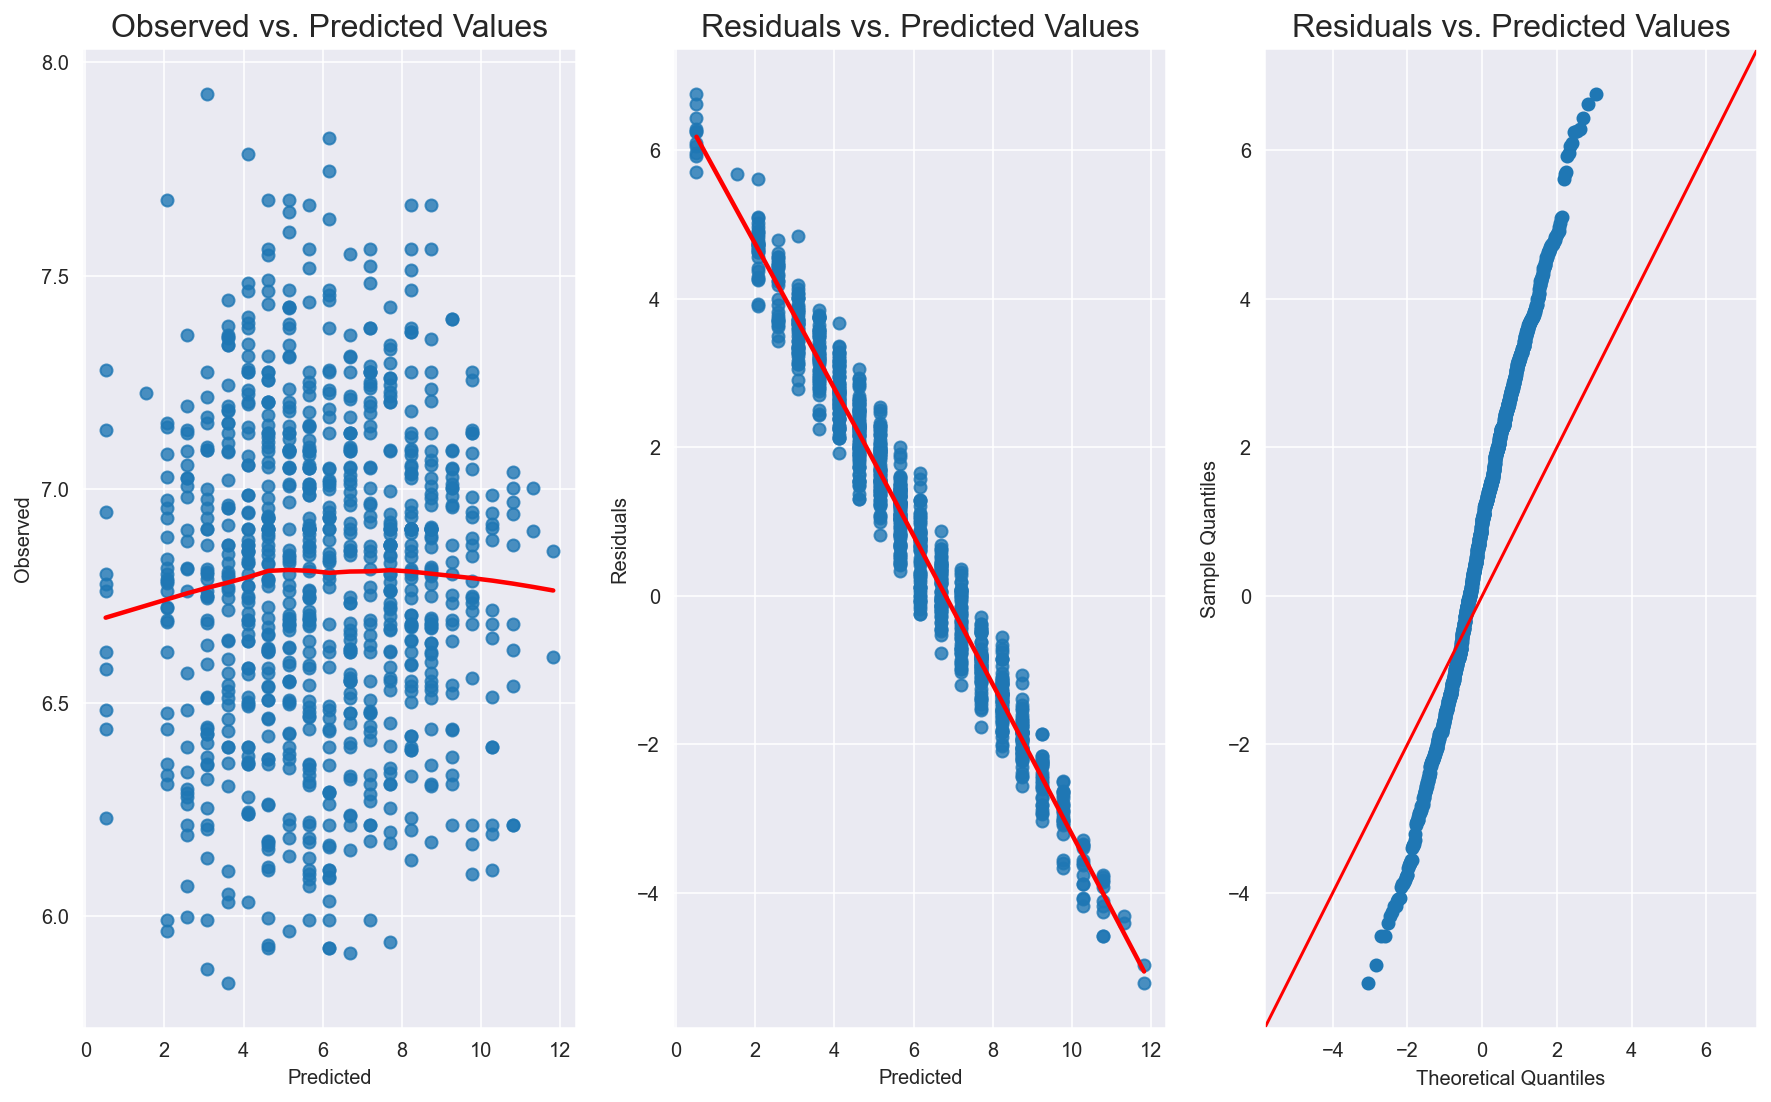

In [76]:
# testing non-linearity for years of work experience
X5 = pd.DataFrame(exper)
Y5 = pd.DataFrame(lwage)
reg_exper = sm.OLS(Y5,X5).fit()
R_result(reg_exper)
linearity_test(reg_exper, Y)  

The inspection of the plots shows that the linearity assumption is **not** satisfied.

original R-Squared equals to 0.6910245614752442


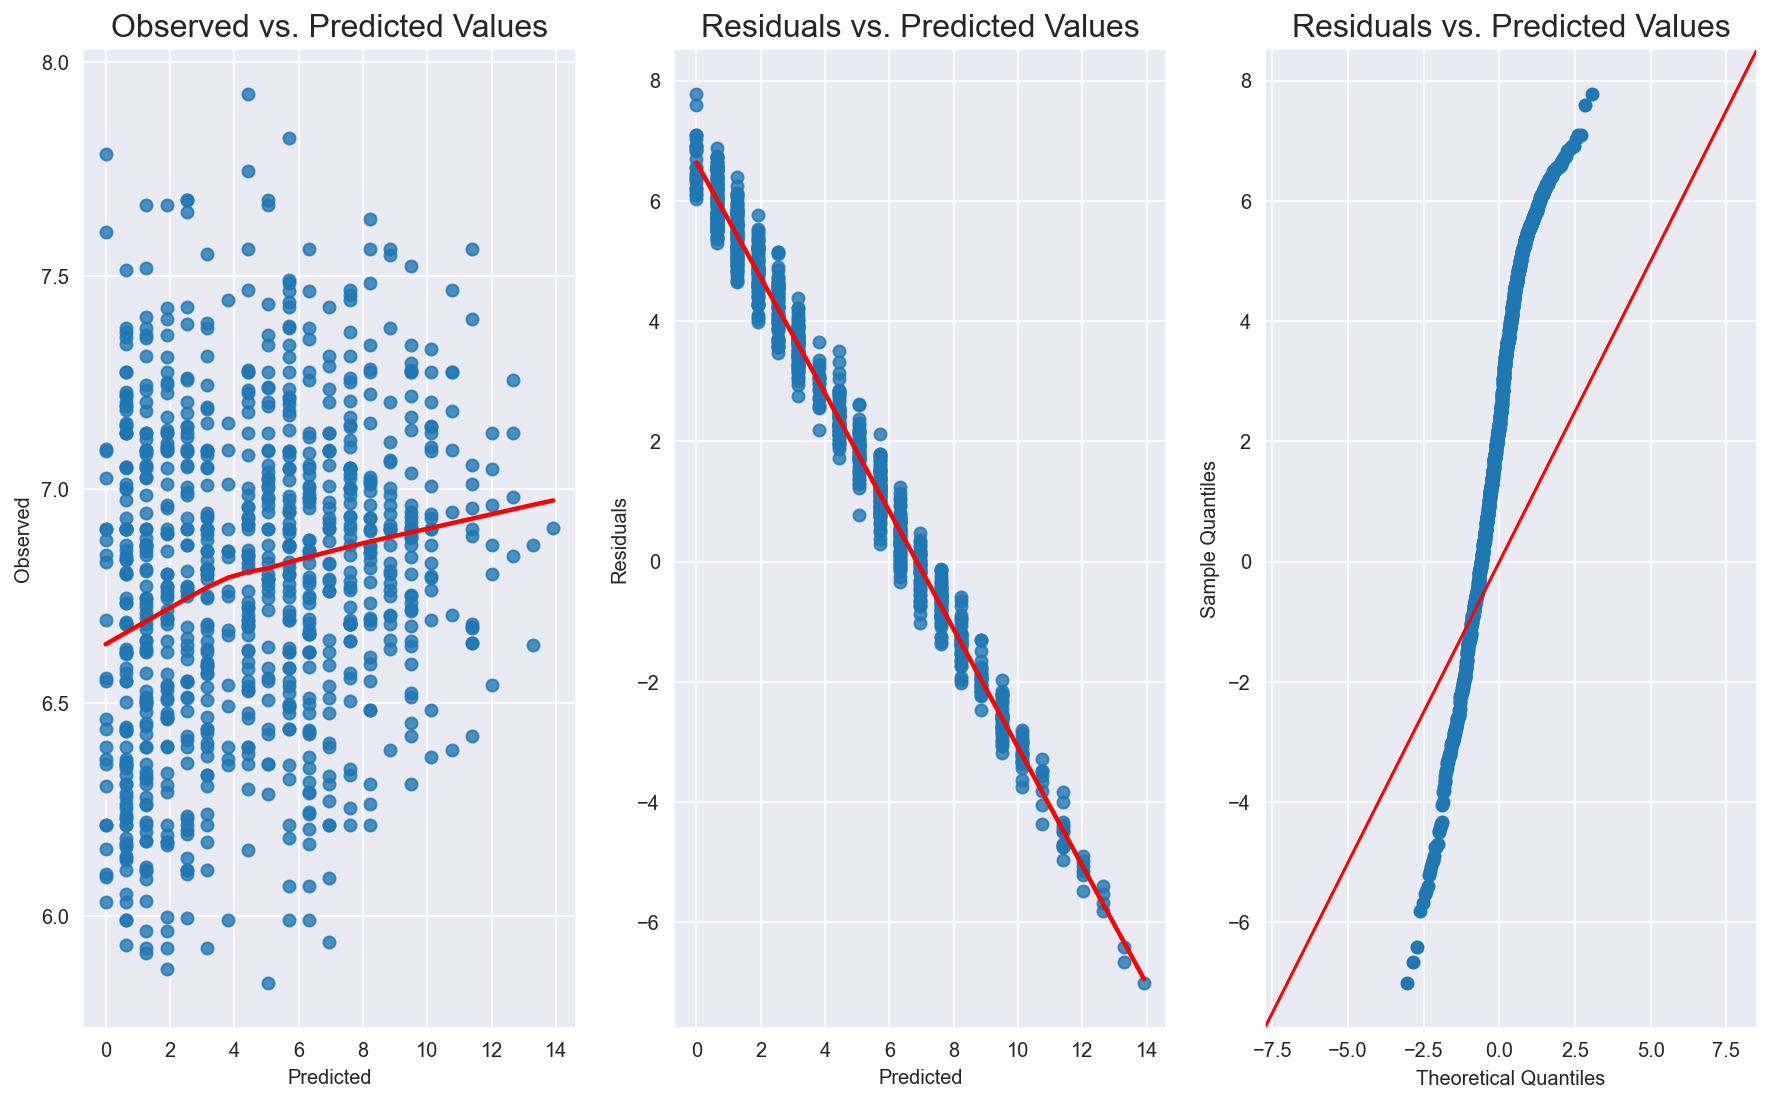

In [77]:
# testing non-linearity for years with current employer
X6 = pd.DataFrame(tenure)
Y6 = pd.DataFrame(lwage)
reg_tenure = sm.OLS(Y6,X6).fit()
R_result(reg_tenure)
linearity_test(reg_tenure, Y)  

original R-Squared equals to 0.9903195312692971


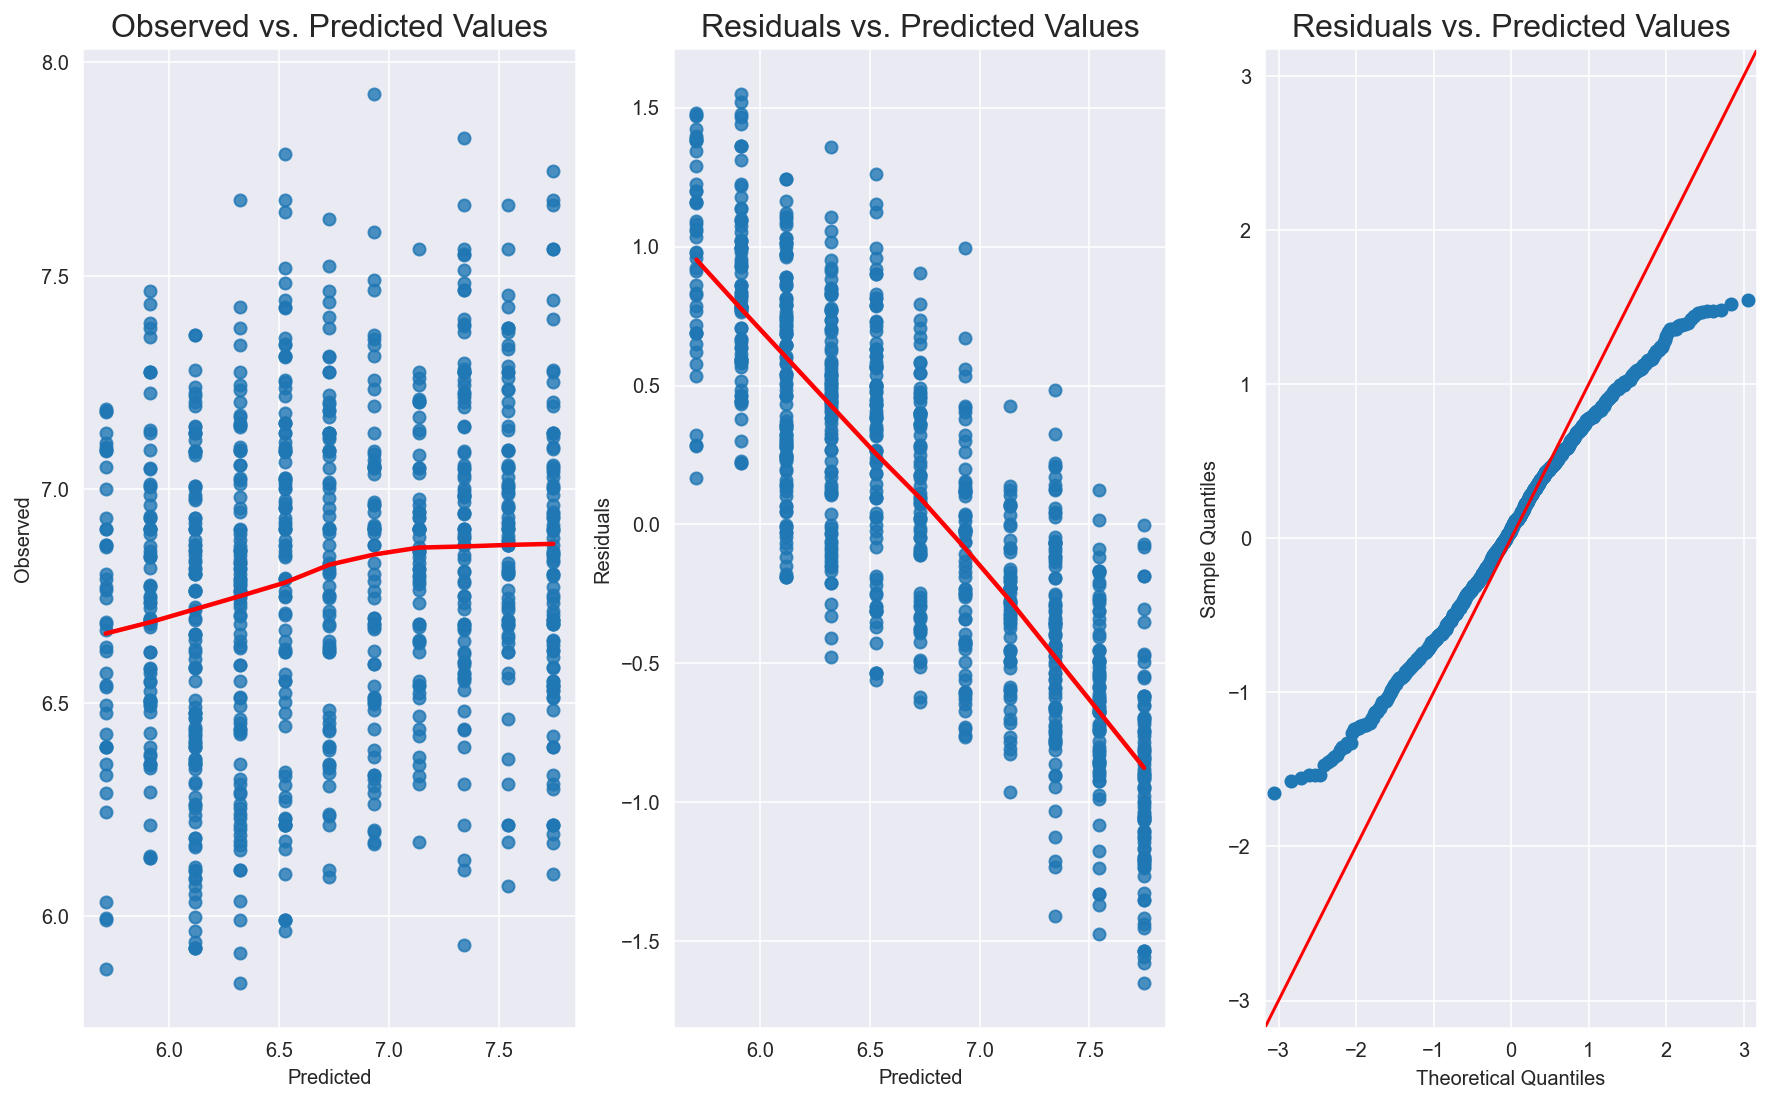

In [78]:
# testing non-linearity for age in years
X7 = pd.DataFrame(age)
Y7 = pd.DataFrame(lwage)
reg_age = sm.OLS(Y7,X7).fit()
R_result(reg_age)
linearity_test(reg_age, Y)  

original R-Squared equals to 0.6081248934728023


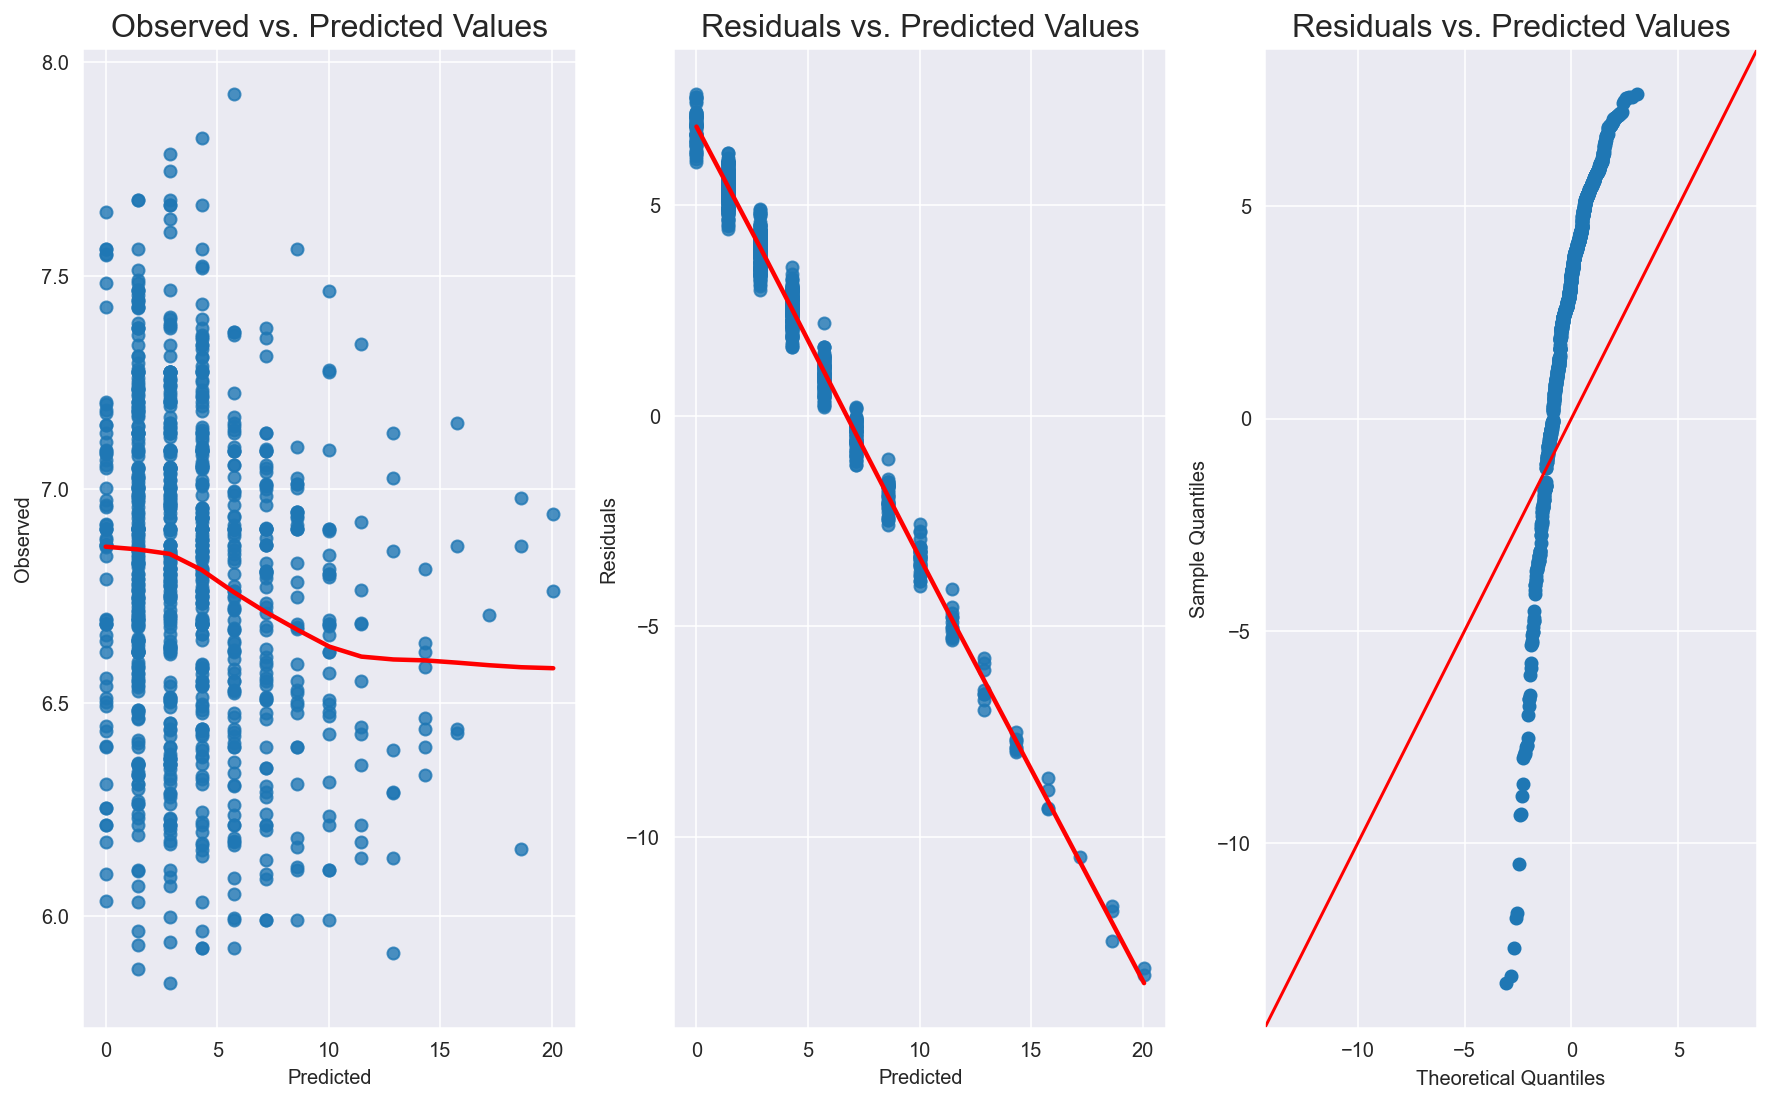

In [79]:
# testing non-linearity for number of siblings
X8 = pd.DataFrame(sibs)
Y8 = pd.DataFrame(lwage)
reg_sibs = sm.OLS(Y8,X8).fit()
R_result(reg_sibs)
linearity_test(reg_sibs, Y)  

original R-Squared equals to 0.6852074519616002


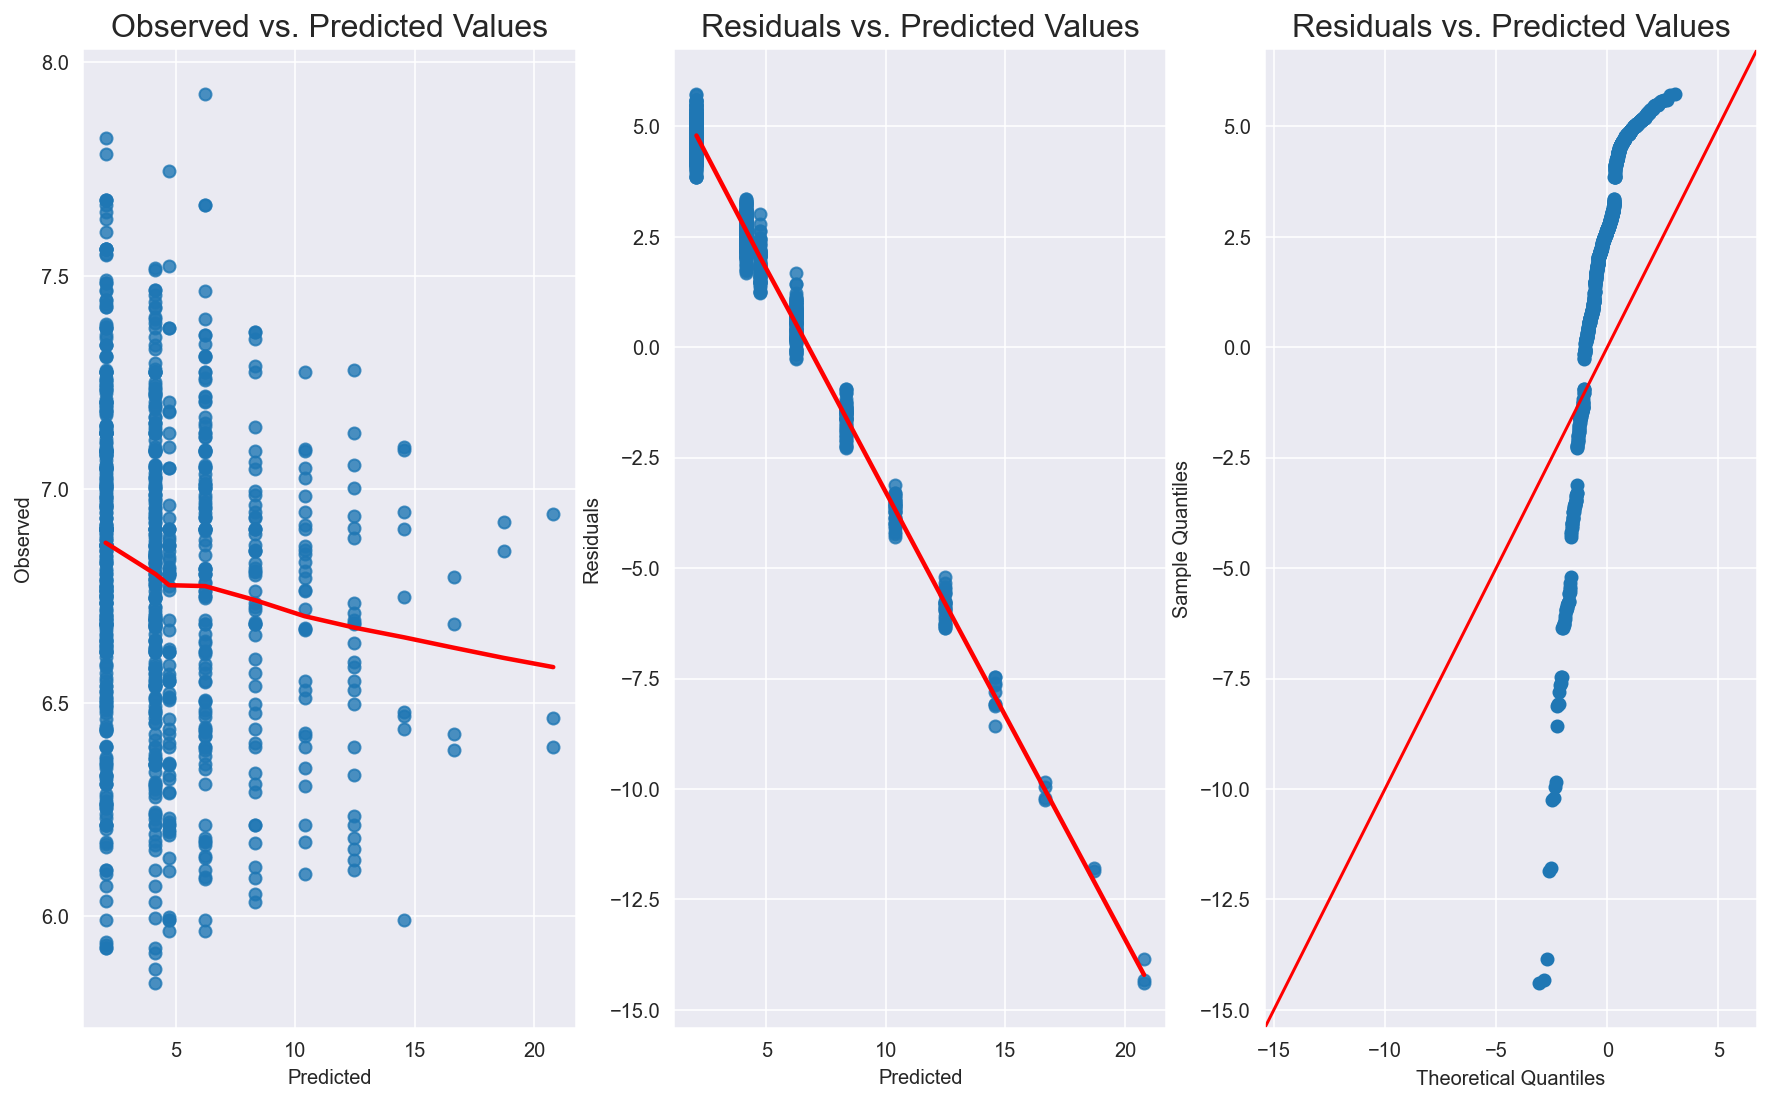

In [80]:
# testing non-linearity for birth order
X9 = pd.DataFrame(brthord)
Y9 = pd.DataFrame(lwage)
reg_brthord = sm.OLS(Y9,X9).fit()
R_result(reg_brthord)
linearity_test(reg_brthord, Y) 

original R-Squared equals to 0.9441980511162297


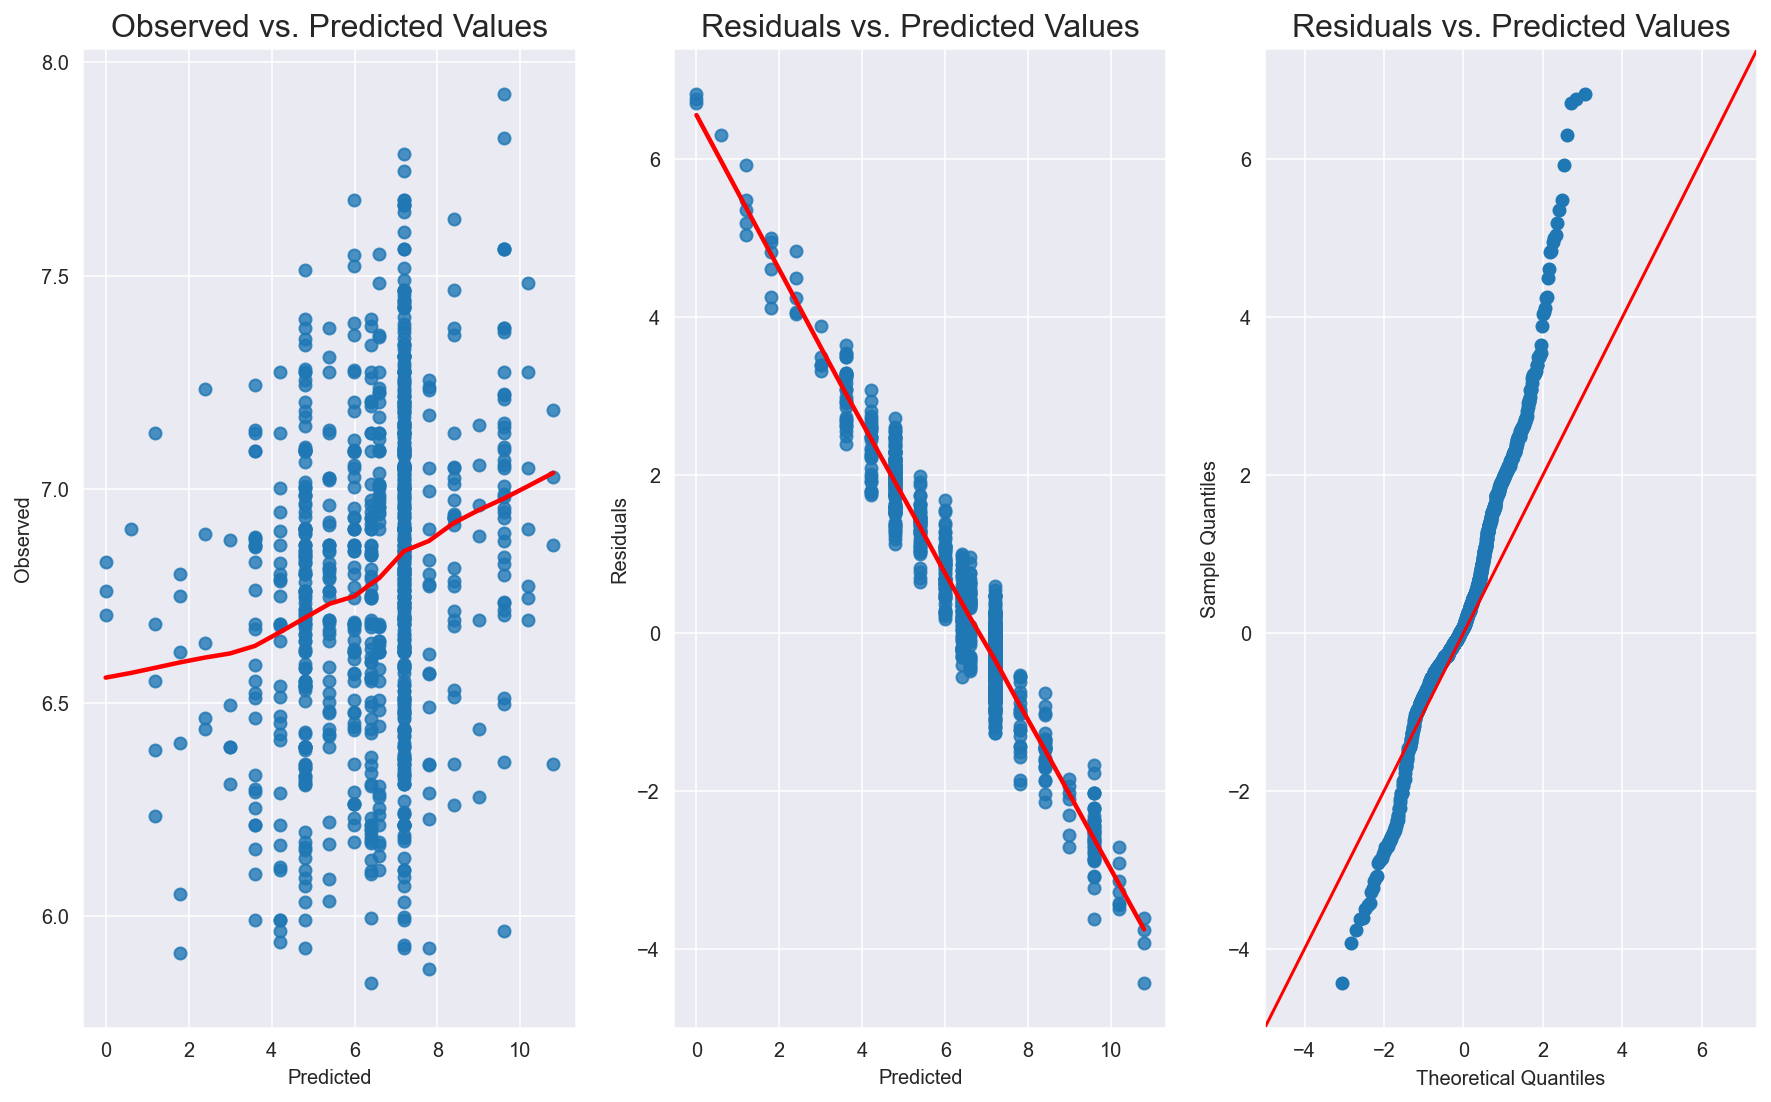

In [81]:
# testing non-linearity for mother's education
X10 = pd.DataFrame(meduc)
Y10 = pd.DataFrame(lwage)
reg_meduc = sm.OLS(Y10,X10).fit()
R_result(reg_meduc)
linearity_test(reg_meduc, Y) 

original R-Squared equals to 0.9280861560311758


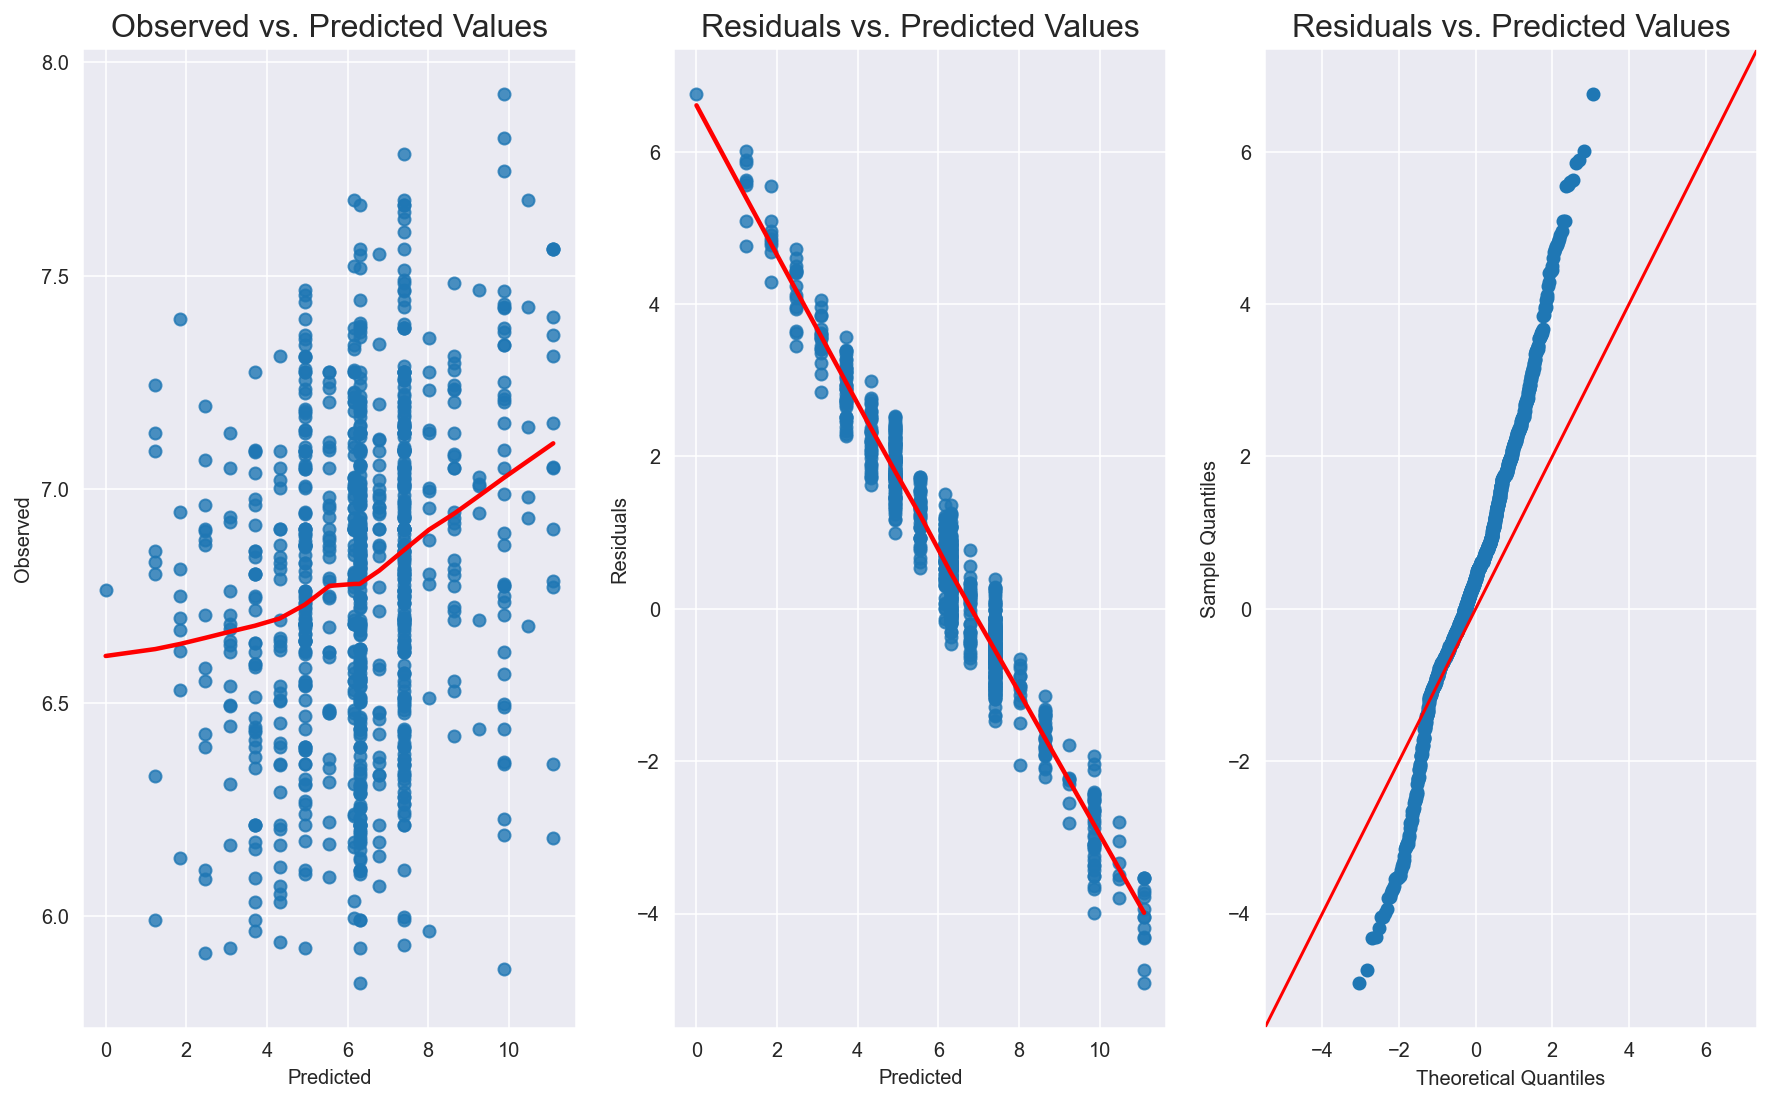

In [82]:
# testing non-linearity for father's education
X10 = pd.DataFrame(feduc)
Y10 = pd.DataFrame(lwage)
reg_feduc = sm.OLS(Y10,X10).fit()
R_result(reg_feduc)
linearity_test(reg_feduc, Y) 

**Interpretaion:** The inspection of the plots shows that the linearity assumption is not satisfied for several variables. Combining the histograms, we decided to transform the data for hours, educ, tenure and age.

### Transformations

We address Box-Cox Power Transform, log transformation and qua to help meet linearity.

In [83]:
## set bc_test, plot results and append values after transformation
def bc_test(x,title):
    
    bc_x, lambda_x = stats.boxcox(x)
    bc_x = pd.DataFrame(bc_x)
    mydata[title]=bc_x
    print("lambda = %s" % lambda_x)

    fig, ax = plt.subplots(1,2)

    sns.histplot(x,ax=ax[0])
    plt.title("Original")
    sns.histplot(bc_x)
    plt.title("Box-Cos Transformed:" +title)

lambda = -0.7736645846168021


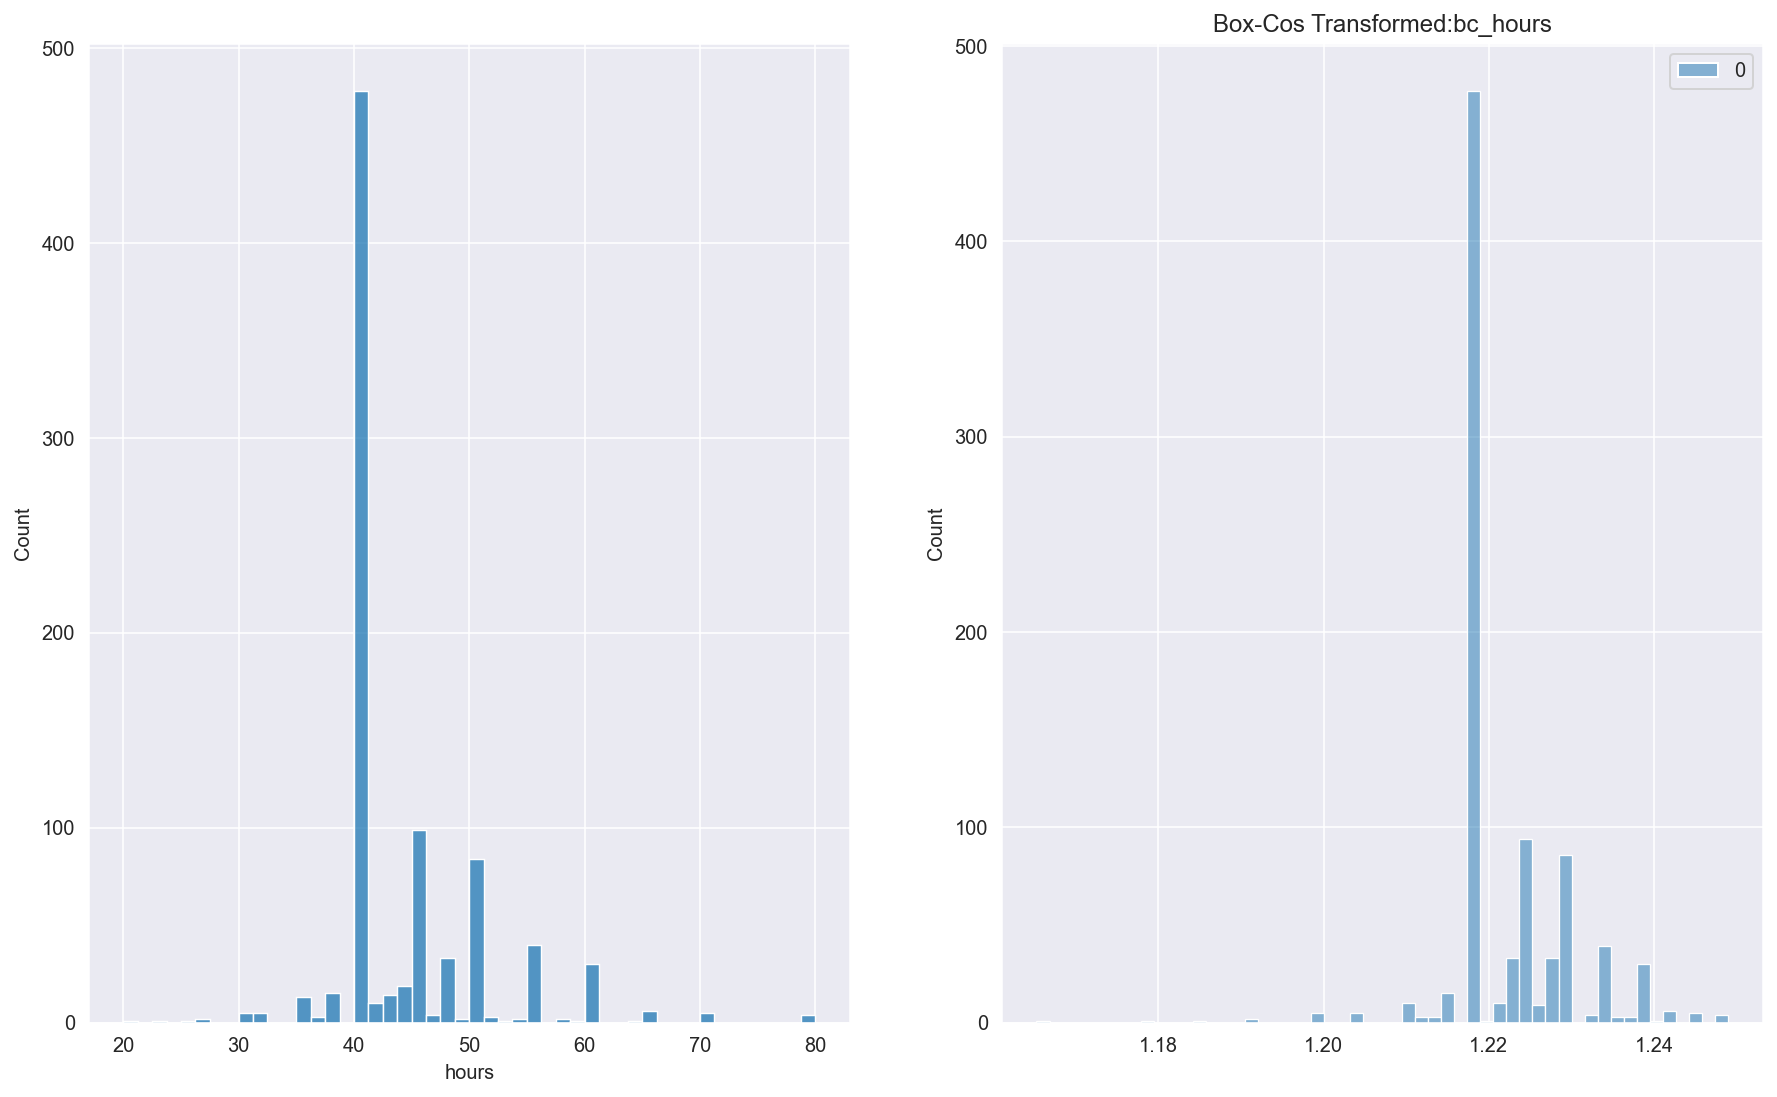

In [84]:
## Boxplot results for hours
bc_test(hours,'bc_hours')

lambda = -0.7713479682377768


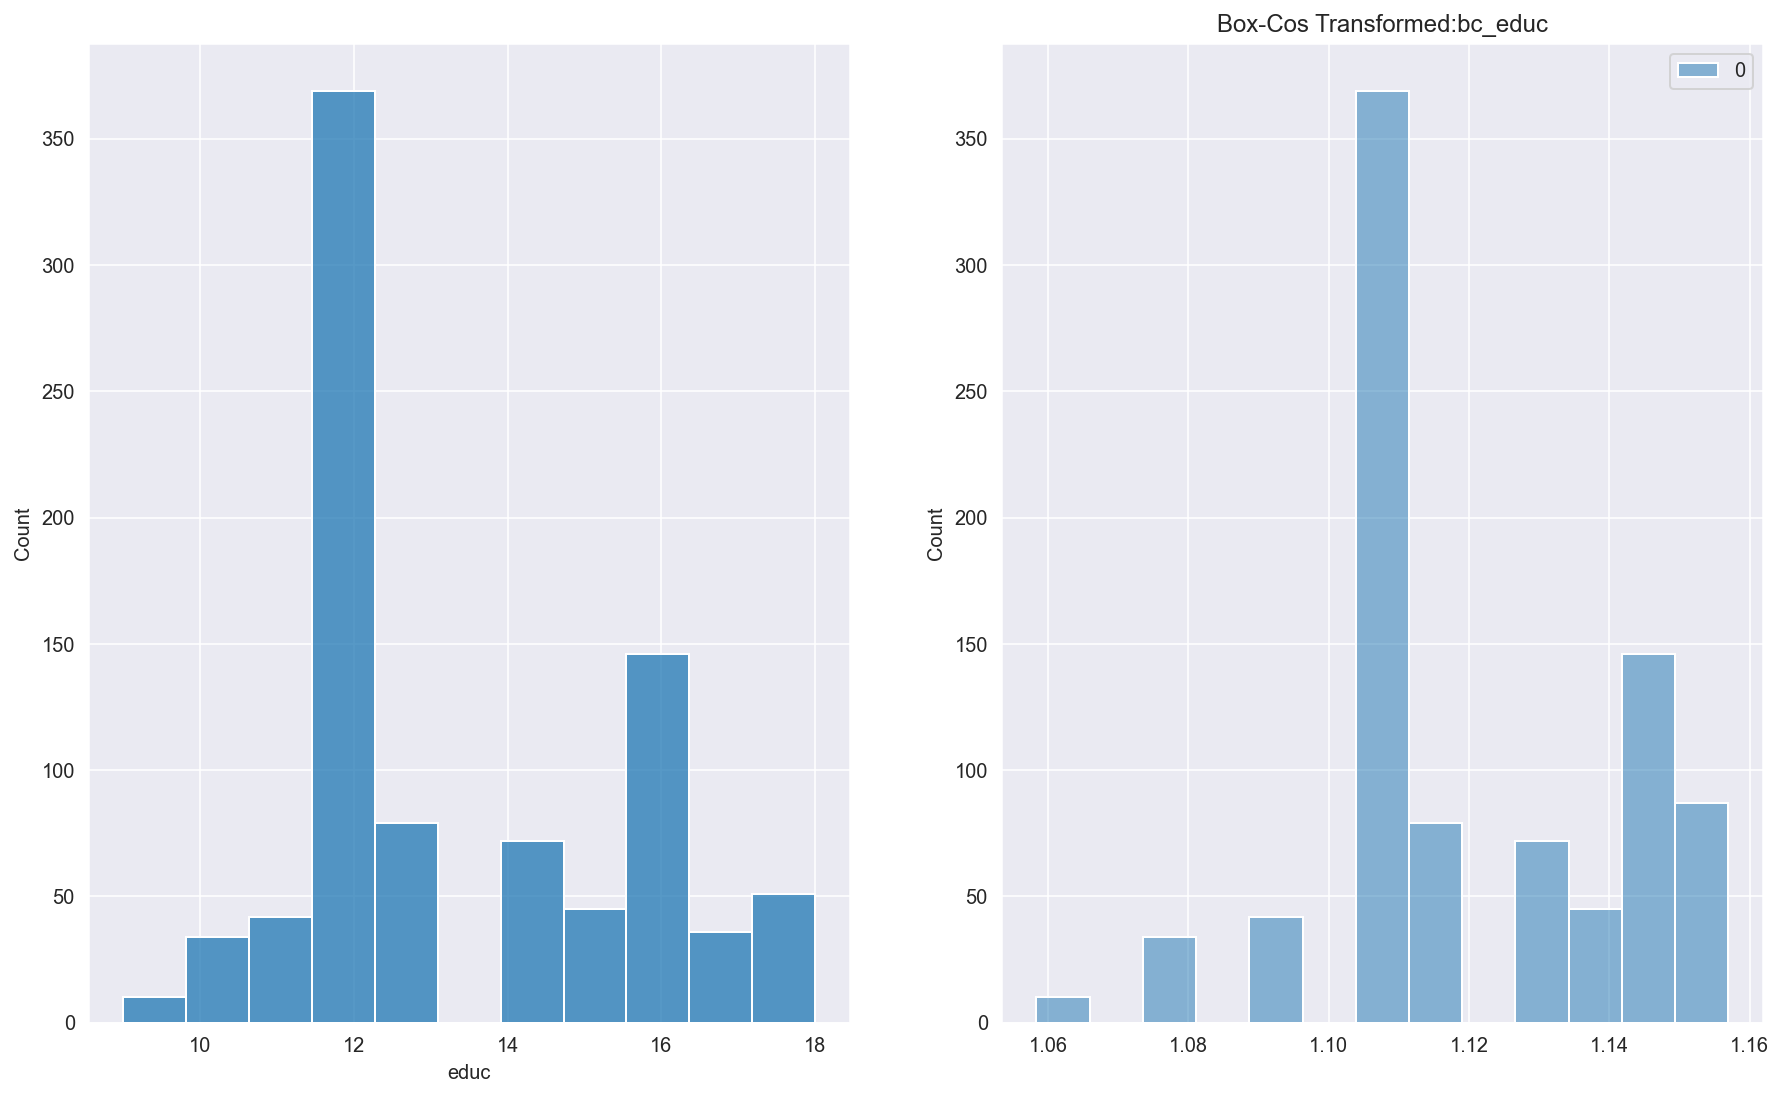

In [85]:
## Boxplot results for educ
bc_test(educ,'bc_educ')

lambda = 1.4121107398033335


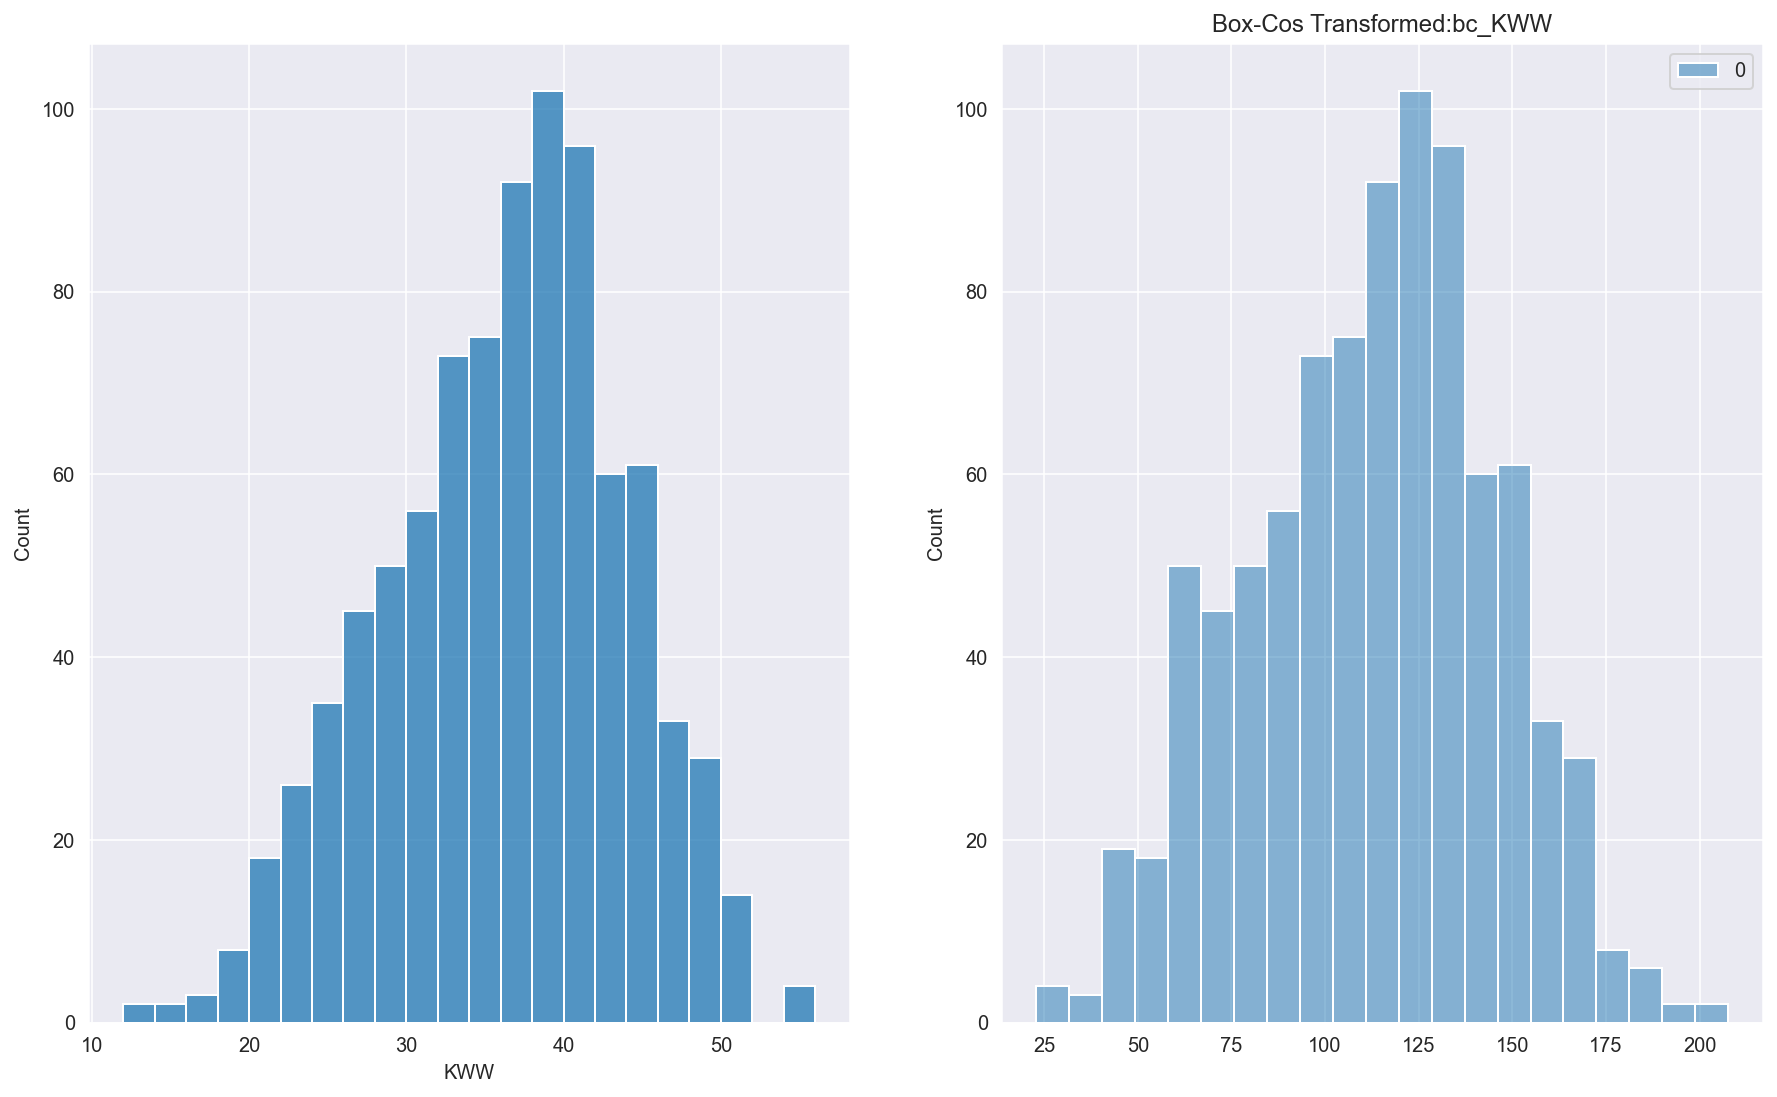

In [86]:
## Boxplot results for KWW
bc_test(KWW,'bc_KWW')

/Users/StevenLi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/StevenLi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


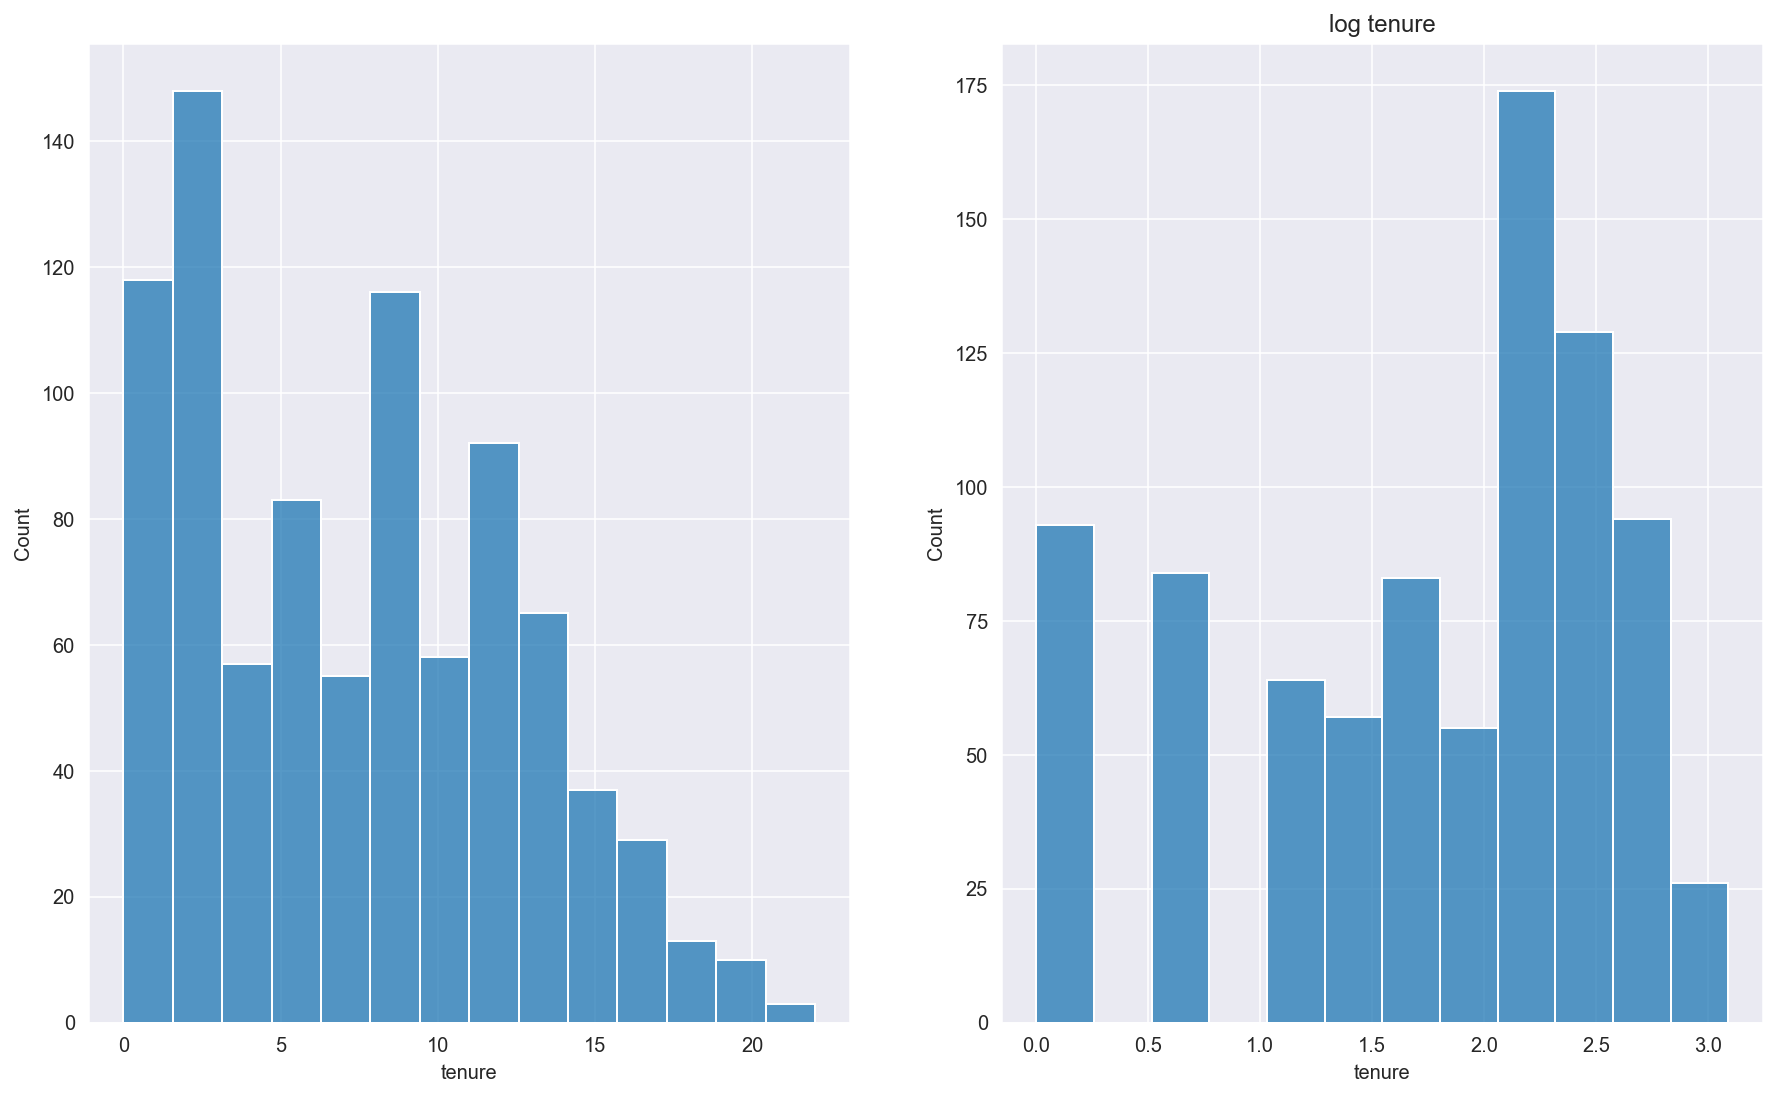

In [87]:
## Box-Cox cannot be used in this case since value tenure contains 0. Thus introduce log transformation
fig, ax = plt.subplots(1,2)
sns.histplot(tenure,ax=ax[0])
plt.title("Original")
sns.histplot(np.log(tenure),ax=ax[1])
plt.title("log tenure")
mydata['ltenure']= np.log(tenure)

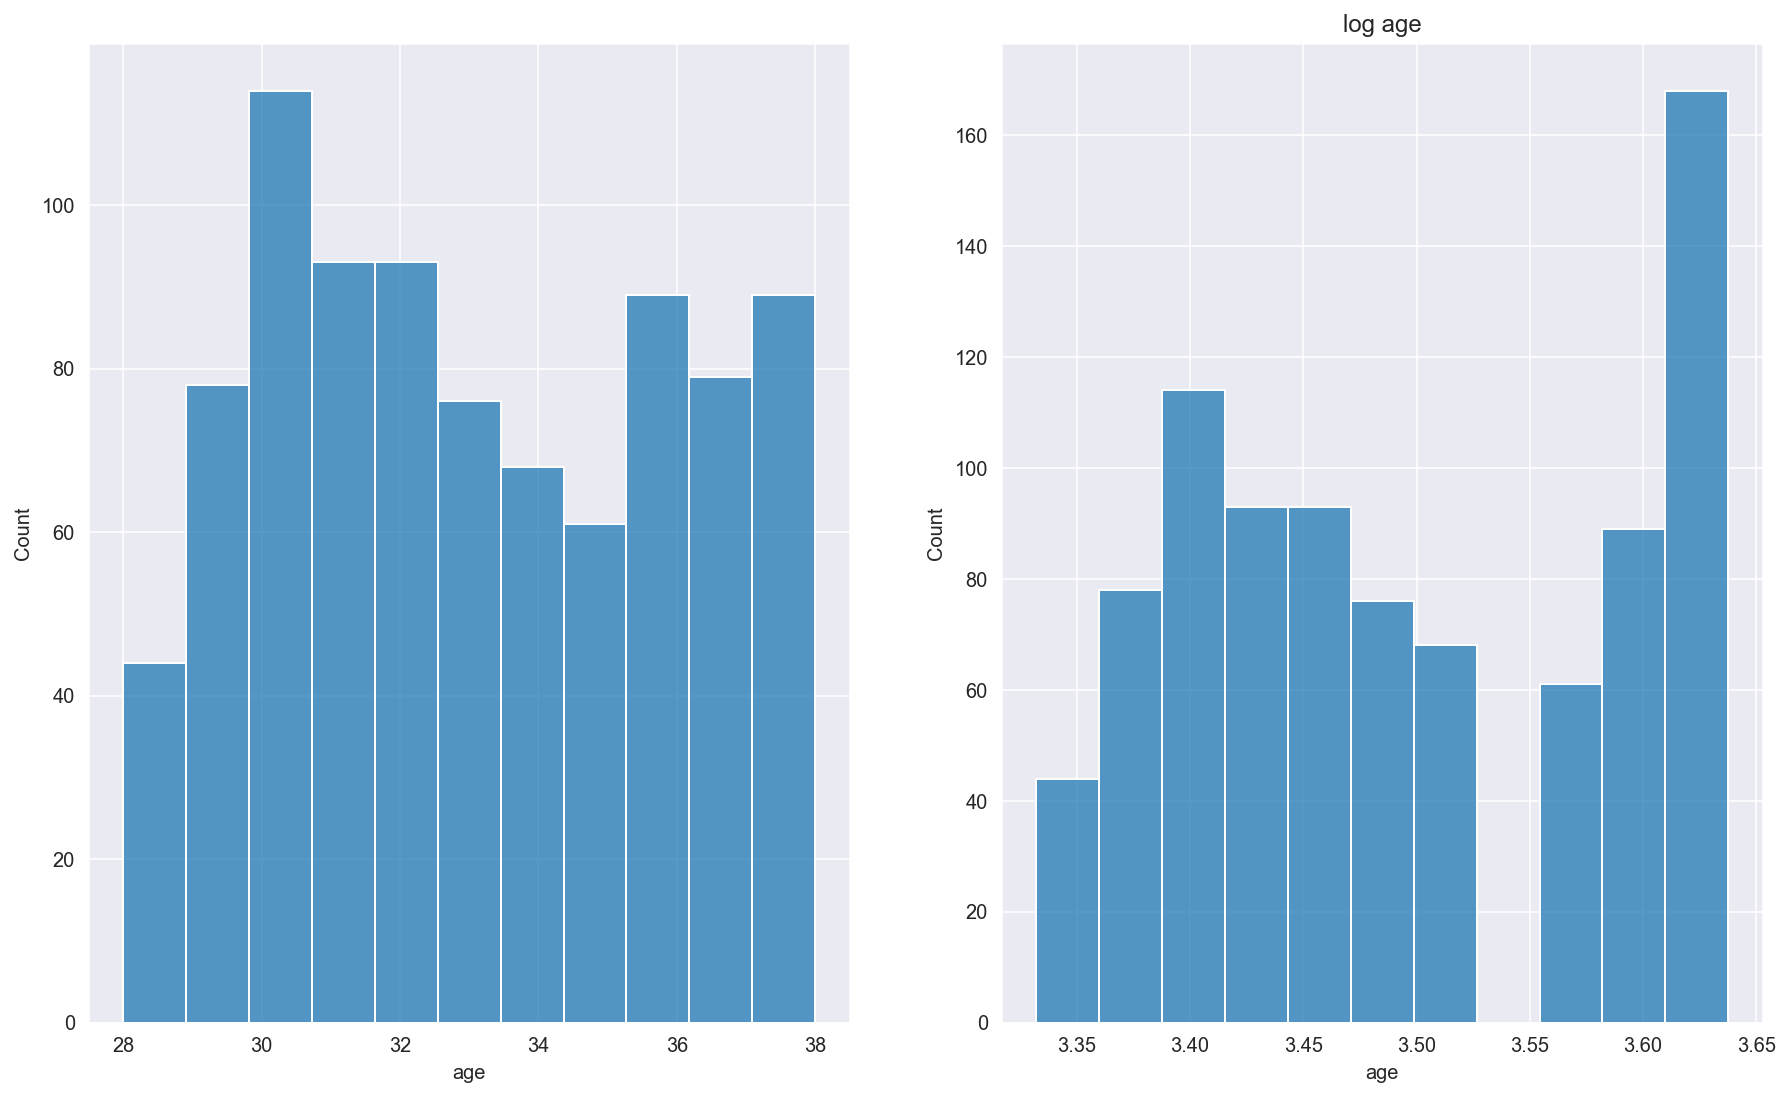

In [88]:
## Box-Cox cannot be used in this case since value tenure contains 0. Thus introduce log transformation
fig, ax = plt.subplots(1,2)
sns.histplot(age,ax=ax[0])
plt.title("Original")
sns.histplot(np.log(age),ax=ax[1])
plt.title("log age")
mydata['lage']= np.log(age)

In [89]:
## mydata after transformation
mydata.describe()

wage       hours          IQ         KWW        educ  \
count   884.000000  884.000000  884.000000  884.000000  884.000000   
mean    958.575792   43.778281  101.255656   35.750000   13.457014   
std     363.766331    6.902536   15.025393    7.596845    2.190106   
min     345.000000   20.000000   50.000000   12.000000    9.000000   
25%     692.000000   40.000000   92.000000   31.000000   12.000000   
50%     912.500000   40.000000  102.000000   37.000000   12.000000   
75%    1155.000000   46.000000  112.000000   41.000000   16.000000   
max    2771.000000   80.000000  145.000000   56.000000   18.000000   

            exper      tenure         age     married       black  ...  \
count  884.000000  884.000000  884.000000  884.000000  884.000000  ...   
mean    11.590498    7.389140   33.073529    0.901584    0.123303  ...   
std      4.356919    5.041407    3.090962    0.298045    0.328971  ...   
min      1.000000    0.000000   28.000000    0.000000    0.000000  ...   
25%      8.000000    3.000000   30.000000    1.000000    0.000000  ...   
50%     11.000000    7.000000   33.000000    1.000000    0.000000  ...   
75%     15.000000   11.000000   36.000000    1.000000    0.000000  ...   
max     23.000000   22.000000   38.000000    1.000000    1.000000  ...   

             sibs     brthord       meduc       feduc       lwage    bc_hours  \
count  884.000000  884.000000  884.000000  884.000000  884.000000  835.000000   
mean     2.917421    2.258482   10.700394   10.223466    6.796159    1.222082   
std      2.286147    1.497682    2.685455    2.931928    0.374453    0.007829   
min      0.000000    1.000000    0.000000    0.000000    5.843544    1.165233   
25%      1.000000    1.000000    9.000000    8.000000    6.539586    1.218078   
50%      2.000000    2.000000   11.500000   10.217274    6.816188    1.218078   
75%      4.000000    3.000000   12.000000   12.000000    7.051856    1.225711   
max     14.000000   10.000000   18.000000   18.000000    7.926963    1.248989   

          bc_educ      bc_KWW     ltenure        lage  
count  835.000000  835.000000  884.000000  884.000000  
mean     1.118690  111.307069        -inf    3.494368  
std      0.021400   32.571921         NaN    0.093529  
min      1.058366   22.954016        -inf    3.332205  
25%      1.105743   89.677412    1.098612    3.401197  
50%      1.105743  110.927442    1.945910    3.496508  
75%      1.143691  133.432565    2.397895    3.583519  
max      1.156956  202.394724    3.091042    3.637586  

[8 rows x 22 columns]

In [90]:
mydata.isnull().sum()

wage         0
hours        0
IQ           0
KWW          0
educ         0
exper        0
tenure       0
age          0
married      0
black        0
south        0
urban        0
sibs         0
brthord      0
meduc        0
feduc        0
lwage        0
bc_hours    49
bc_educ     49
bc_KWW      49
ltenure      0
lage         0
dtype: int64

In [91]:
# Replace Null Value With Mean
m_h = mydata['bc_hours'].mean()
mydata['bc_hours'].fillna(value=m_h,inplace=True)

m_ed = mydata['bc_educ'].mean()
mydata['bc_educ'].fillna(value=m_ed,inplace=True)

m_k = mydata['bc_KWW'].mean()
mydata['bc_KWW'].fillna(value=m_k,inplace=True)

mydata.replace([-np.inf], 0, inplace=True)

In [92]:
mydata.isnull().any()

wage        False
hours       False
IQ          False
KWW         False
educ        False
exper       False
tenure      False
age         False
married     False
black       False
south       False
urban       False
sibs        False
brthord     False
meduc       False
feduc       False
lwage       False
bc_hours    False
bc_educ     False
bc_KWW      False
ltenure     False
lage        False
dtype: bool

In [93]:
Y_new = mydata['lwage']
X_new = mydata[['bc_hours', 'bc_educ','ltenure','IQ', 'bc_KWW',  'exper',  'married','lage', 
                                  'black', 'south', 'urban', 'sibs', 'brthord', 'meduc','feduc']]
X_new = sm.add_constant(X_new)
model = sm.OLS(Y_new,X_new)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     27.70
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           1.02e-63
Time:                        17:11:32   Log-Likelihood:                -212.63
No. Observations:                 884   AIC:                             457.3
Df Residuals:                     868   BIC:                             533.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9251      1.853      2.657      0.008       1.287       8.563
bc_hours      -0.5690      1.402     -0.406      0.685      -3.321       2.183
bc_educ       -0.6958      0.553     -1.259      0.208      -1.780       0.389
ltenure        0.0703      0.012      5.843      0.000       0.047       0.094
IQ             0.0062      0.001      7.678      0.000       0.005       0.008
bc_KWW         0.0004      0.000      1.093      0.275      -0.000       0.001
exper          0.0001      0.003      0.049      0.961      -0.006       0.006
married        0.1660      0.036      4.652      0.000       0.096       0.236
lage           0.6033      0.131      4.608      0.000       0.346       0.860
black         -0.1292      0.037     -3.539      0.000      -0.201      -0.058
south         -0.0570      0.024     -2.421      0.016      -0.103      -0.011
urban          0.1968      0.024      8.242      0.000       0.150       0.244
sibs           0.0037      0.006      0.616      0.538      -0.008       0.015
brthord       -0.0175      0.009     -2.037      0.042      -0.034      -0.001
meduc          0.0112      0.005      2.363      0.018       0.002       0.021
feduc          0.0091      0.004      2.098      0.036       0.001       0.018
==============================================================================
Omnibus:                        3.755   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                3.040
Skew:                           0.002   Prob(JB):                        0.219
Kurtosis:                       2.713   Cond. No.                     3.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

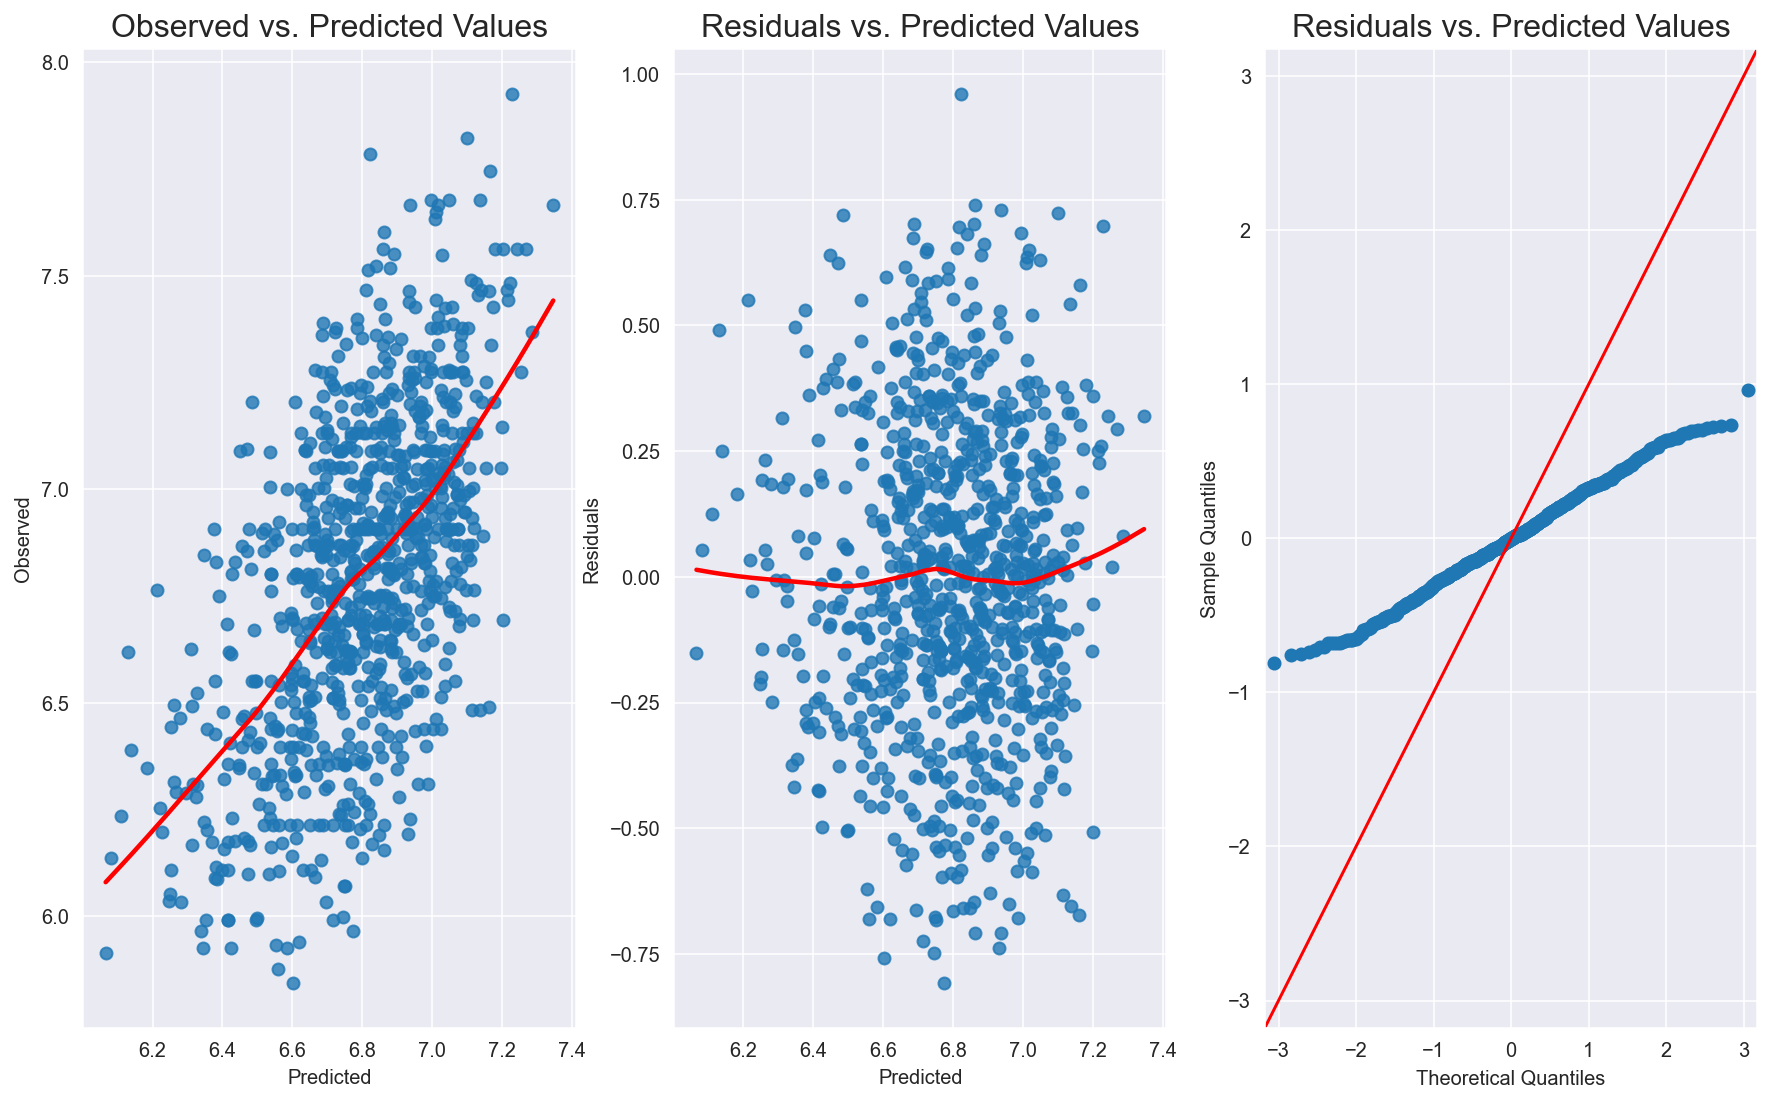

In [94]:
linearity_test(results, Y)  

**Interpretaion:** 
1. Transformations include 
    ` [Box-Cox transformation on hours, kww, educ]`, and
     `[log transformation on tenure and age]`
2. The overall result for the new regression shows linearity and normality.
3. The result is more fit for kww

## Variable Selection

### Boruta Algorithm

In [95]:
boruta_data = mydata[["lwage", "bc_hours", "IQ", "bc_KWW", "bc_educ", "exper", "ltenure", "lage", "married", 
                      "black", "south", "urban", "sibs", "brthord", "meduc", "feduc"]].copy()

  0%|          | 0/10 [00:00<?, ?it/s]

4 attributes confirmed important: ['IQ', 'urban', 'lage', 'ltenure']
2 attributes confirmed unimportant: ['bc_educ', 'bc_hours']
9 tentative attributes remains: ['feduc', 'bc_KWW', 'exper', 'married', 'south', 'meduc', 'black', 'brthord', 'sibs']


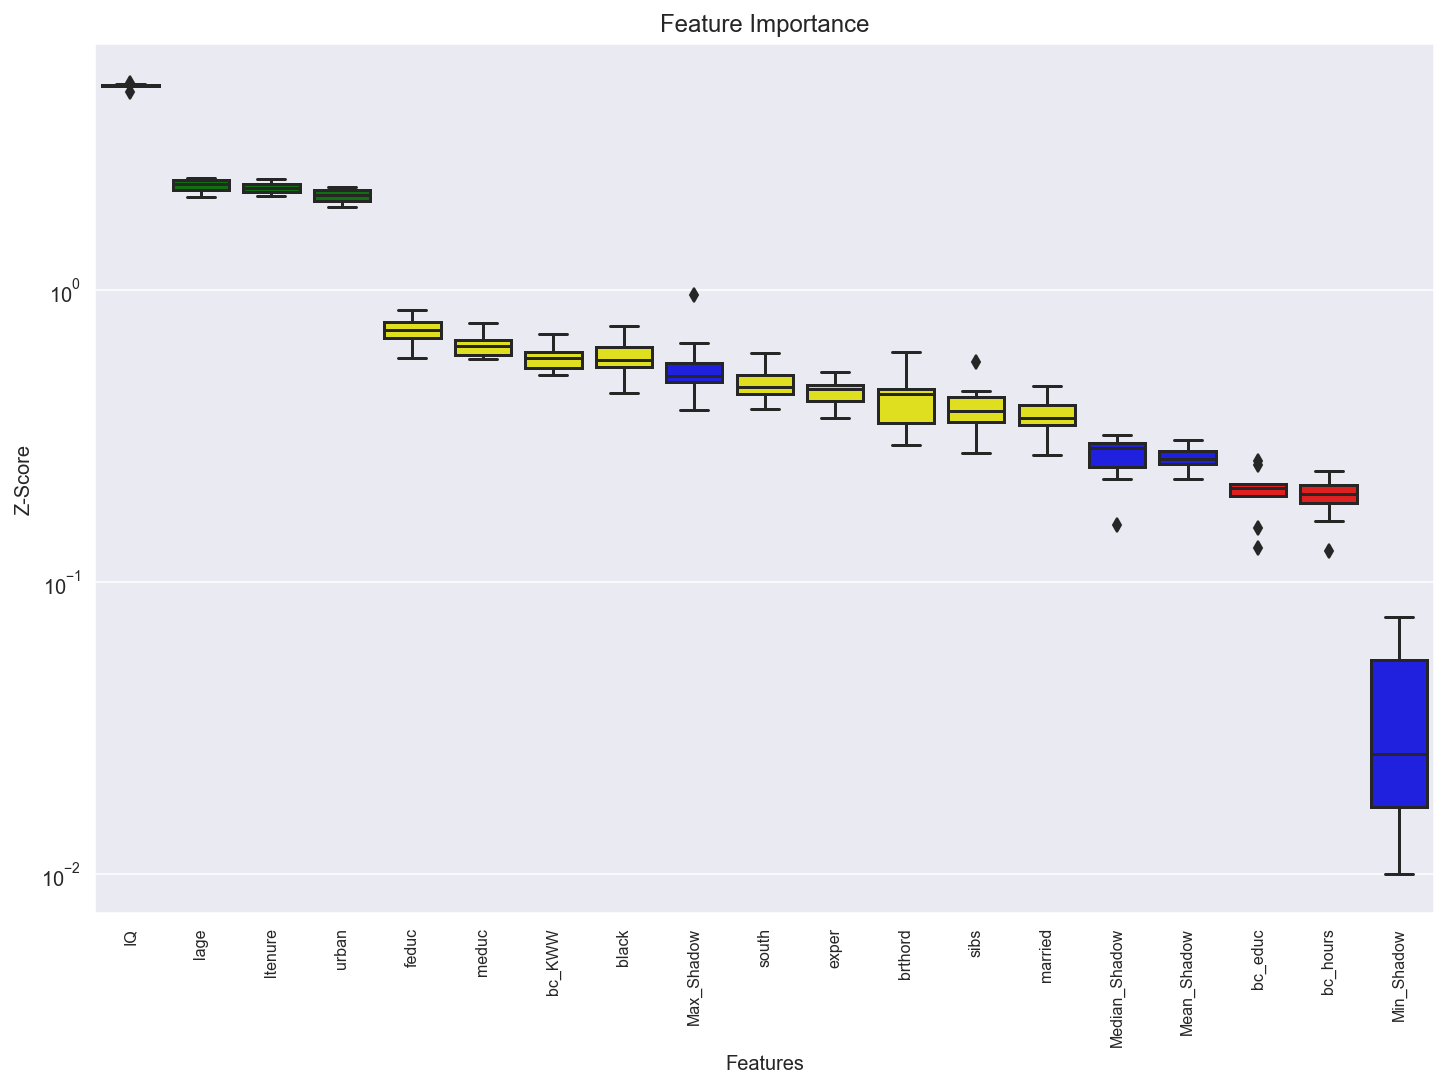

In [96]:
from BorutaShap import BorutaShap
x = boruta_data.iloc[:, 1:]
y = boruta_data['lwage']

Feature_Selector = BorutaShap(importance_measure='shap', classification=False)
Feature_Selector.fit(X=x, y=y, n_trials=10, random_state=0)
Feature_Selector.plot(which_features='all')

**Interpretation:** According to boruta algorithm, the top 2 predictors are IQ and lage. 

### Mallows CP

In [97]:
subdata = mydata[["lwage", "bc_hours", "IQ", "bc_KWW", "bc_educ", "exper", "ltenure", "lage", "sibs", "brthord", "meduc", "feduc"]].copy()

In [98]:
from RegscorePy import mallow
import itertools

# Getting the Base Model
model = smf.ols(formula = 'lwage ~ bc_hours+IQ+bc_KWW+bc_educ+exper+ltenure+lage+married+\n black+south+urban+sibs+brthord+meduc+feduc',data=mydata)
mfit = model.fit()
y = mydata['lwage']
y_pred = mfit.fittedvalues
storage_cp = pd.DataFrame(columns = ["Variables", "CP"])
k = 12

In [99]:
# Loop

for subset in itertools.combinations(subdata.columns[1:],1):
    formula1='lwage~' + '+'.join(subset)
    resultss= smf.ols(formula=formula1,data = mydata).fit()
    y_sub=resultss.fittedvalues
    p=len(subset)+1
    
    cp=mallow.mallow(y,y_pred,y_sub,k,p)
    
    storage_cp=storage_cp.append({'Variables':subset,'CP':cp},ignore_index=True)
        
final = pd.DataFrame(storage_cp.sort_values(by = "CP"))
pd.set_option('display.max_colwidth', -1)
final.head()

Variables          CP
1   (IQ,)       232.056744
9   (meduc,)    335.019435
10  (feduc,)    339.225202
5   (ltenure,)  354.178986
6   (lage,)     360.312478

**Interpretation:** According to mallow cp, the top 2 predictors are IQ and meduc. 

## Model Building

### Select Final Regression Model

**According to boruta algorithm and mallow cp, we will individually build regression model with respect to IQ, lage and meduc.**

In [100]:
# lwage ~ IQ
iq_fit    = smf.ols('lwage ~ IQ',data = mydata).fit()

# lwage ~ lage
lage_fit  = smf.ols('lwage ~ lage',data = mydata).fit()

# lwage ~ meduc
meduc_fit = smf.ols('lwage ~ meduc',data = mydata).fit()

print(iq_fit.summary(),lage_fit.summary(),meduc_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     140.6
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           3.34e-30
Time:                        17:13:10   Log-Likelihood:                -320.11
No. Observations:                 884   AIC:                             644.2
Df Residuals:                     882   BIC:                             653.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8604      0.080     73.463      0.0

**Interpretation:** We can see the summary of each of the regression model. We can conclude that when using one predictor as the regressor, **IQ** will be the best fit with an 0.138 R squared.

### Bootstrapping 

In [106]:
# build dataframe to store sample statistics
coefs = pd.DataFrame(columns = ["B0","B1"])

# we will generate 1000 bootstrap samples
for i in range(1000):
    
    # sample from the data with replacement N times
    sample = mydata.sample(mydata.shape[0] ,replace = True)
    
    # fit model on bootstrap sample
    results2 = smf.ols('lwage ~ IQ', sample).fit()
    
    # pull out the bootstrap sample statistics
    b0,b1 = results2.params

    
    # store the bootstrap sample statistics for later use
    coefs = coefs.append({"B0":b0, "B1":b1}, ignore_index = True)

In [107]:
# the 97.5 percentile of thebootstrap sample statistics
b0_u = coefs.iloc[:, 0].quantile(.975)
b1_u = coefs.iloc[:, 1].quantile(.975)

# the 2.5 percentile of the bootstrap sample statistics
b0_1 = coefs.iloc[:, 0].quantile(.025)
b1_1 = coefs.iloc[:, 1].quantile(.025)

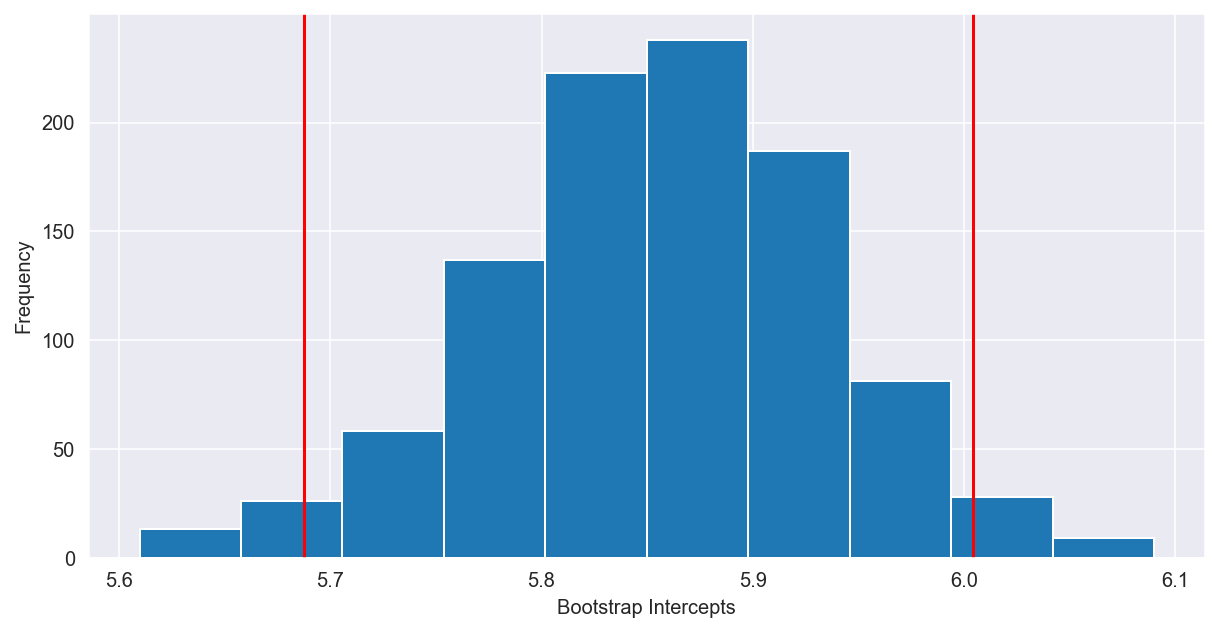

In [110]:
plt.figure(figsize = (10,5))
coefs.B0.hist()
plt.xlabel("Bootstrap Intercepts")
plt.ylabel("Frequency")
plt.axvline(b0_u, color = "red")
plt.axvline(b0_1, color = "red")

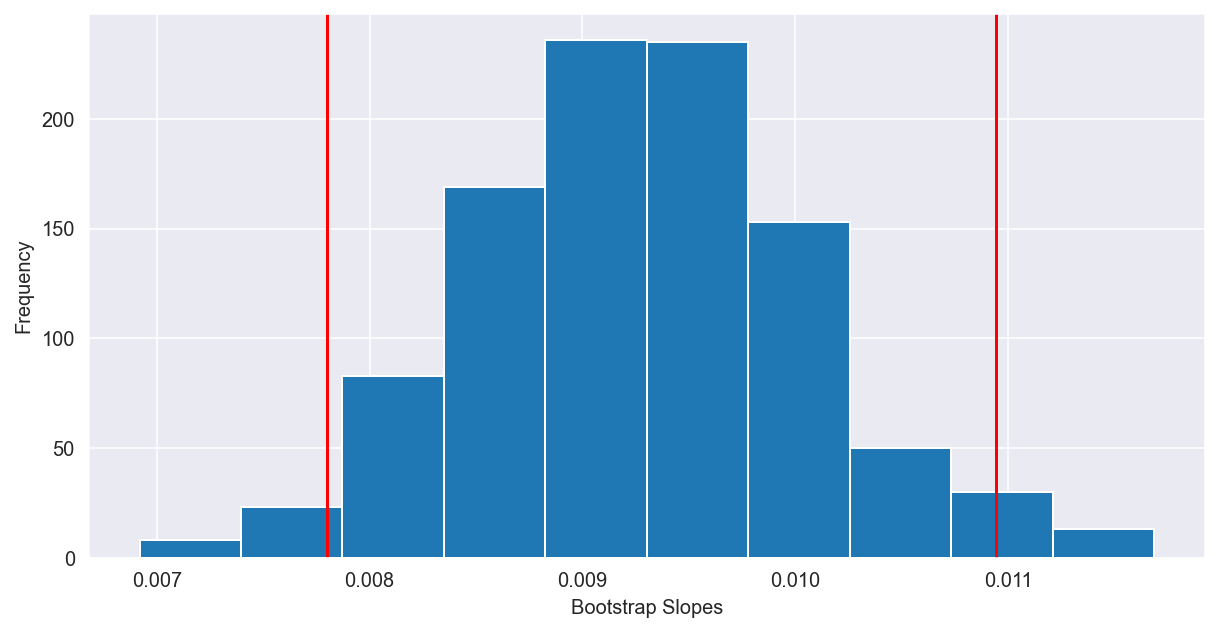

In [111]:
plt.figure(figsize = (10,5))
coefs.B1.hist()
plt.xlabel("Bootstrap Slopes")
plt.ylabel("Frequency")
plt.axvline(b1_u, color = "red")
plt.axvline(b1_1, color = "red")

**Interpretation**: From the historgrams of Bootstrap intercepts and Bootstrap slopes, we can see that among our 1000 estimates for the intercepts and slopes, only few estimates are out of the 95% confidence interval, which means our estimates for the regression intercept and the coeffieint for IQ are robust.

### K-Fold

In [104]:
import sklearn
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits = 5)
for train_index, test_index in kf.split(lwage):
    print("TRAIN:", train_index, "TEST:",test_index)

TRAIN: [177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266
 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284
 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302
 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320
 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338
 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356
 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374
 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392
 393 394 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410
 411 412 413 414 415 416 417 418 419 420 421

In [105]:
x = mydata.to_numpy(mydata['IQ'])
y = mydata.to_numpy(mydata['lwage'])

regr = LinearRegression()
scores = cross_val_score(regr,x,y,cv=5,scoring='neg_mean_squared_error')
print('5-fold CV MSE Scores:', scores)

5-fold CV MSE Scores: [-0.00766168 -0.00913313 -0.00856114 -0.00932804 -0.00837061]


### Training and Testing

In [120]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

x = mydata[['IQ']]
y = mydata[['lwage']]

# Perform an OLS fit using all the data
regr = LinearRegression()
model = regr.fit(x,y)
regr.coef_
regr.intercept_

# Split the data into train  (70%)/test(30%) samples:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Train the model:
regr = LinearRegression()
regr.fit(x_train, y_train)

# Make predictions based on the test sample
y_pred = regr.predict(x_test)

# Evaluate Performance

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.2897154871942047
MSE: 0.126557484702329
RMSE: 0.35574918791520665


## Conclusion
### Evaluation Process

First of all, we performed descriptive analysis on the variables to get insights of the overall data shape, and the correlations between them. Other than helping us to reach understanding of the basic natures of our dataset, results showed normality within the datas. We also discovered problems with outliers, which we subtracted in latter analysis. 

Over the examination of scatter plot, we tested the linearity of variables by plotting the observed and prediction values, the residual and predicted values, and qq-plot for residuals. The results provide empirical evidence for data selecting in our next step. We then transformed several data using Box-Cox and simple log transform to change the shape out data to increase linearity.

After that, we performed simple linear regression on each variable and used Boruta Algorithm and Mallow CP to examine the best. Results indicated that IQ is the best predictor for our regression, thus we further developed our model using IQ as independent variable and Log of wage as dependent variable.

Finally, we examine the robustness of our model by using Bootstrapping and K-fold. We reached satisfactory results.

### Economic Significance

Wage is a import subject of study in the flied of labor economics. Higher wages increase labor costs but also improve the productivity of the labor force in several ways.

Efficiency wage theory focuses on the role of industry effects in explaining variation in wages across workers. Our study provides insight to personal and industrial factors of how personal wage evolute with IQ. 

This study also has a pratical significance.The Companies and governments benefit from paying fair wages.Raising the minimum wage can reallocate workers to more productive establishments. It can address poverty and social inequality and stimulate economic dynamism.

### Findings

Many industry factors are relevant to wage of employer. Among which, IQ is the most strongly correlated predicator. Wage is positively correlated with IQ, and we predicted one percent increase in IQ will induce 0.9 percent change in personal wage.